## COMPONENT ONE: Predicting Customer Spending Behaviour in Streaming Services 
Your goal for this exercise is to explore how supervised learning models can predict Customer 
spending and behaviour patterns in streaming services based on information in this dataset. 
You will also apply classification algorithms and unsupervised learning techniques to 
determine customer churn and identify clustering patterns in customers behaviour respectively

#### Importing the necessary libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.losses import mean_squared_error
from keras.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    classification_report, confusion_matrix, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Data Cleaning and Analysis

In [2]:
# Reading data and making copy
streaming_data_original = pd.read_csv('Streaming.csv')

streaming_data_copy = streaming_data_original.copy() #create a copy

streaming_data_copy = streaming_data_copy.drop_duplicates(keep='last') # drop duplicate rows

streaming_data_copy

Customer_ID   Age  Gender  Subscription_Length Region Payment_Method  \
0     CUST000001  56.0    Male                   54  South         PayPal   
1     CUST000002  69.0  Female                   21   East     Debit Card   
2     CUST000003  46.0  Female                   49   East         PayPal   
3     CUST000004  32.0    Male                   47   West     Debit Card   
4     CUST000005  60.0    Male                    6   East    Credit Card   
...          ...   ...     ...                  ...    ...            ...   
4995  CUST004996  24.0    Male                    5   East     Debit Card   
4996  CUST004997  66.0  Female                   12   East         PayPal   
4997  CUST004998  26.0  Female                    1   East    Credit Card   
4998  CUST004999  53.0  Female                   44  South     Debit Card   
4999  CUST005000  36.0  Female                   22   East     Debit Card   

      Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
0                          0                 9.0              6.42   
1                          1                 2.0             13.77   
2                          3                 8.0             19.91   
3                          3                 1.0             13.39   
4                          2                 NaN             13.18   
...                      ...                 ...               ...   
4995                       0                 8.0             18.03   
4996                       3                 5.0              5.84   
4997                       2                 8.0              6.76   
4998                       1                10.0              5.95   
4999                       1                 8.0             11.36   

      Last_Activity  Monthly_Spend  Churned  
0               319          62.11        1  
1               166          37.27        1  
2               207          61.82        0  
3               108          40.96        1  
4                65          45.97        0  
...             ...            ...      ...  
4995            121          51.61        0  
4996            192          36.32        0  
4997            354          42.07        1  
4998             31          60.09        0  
4999            357          49.48        1  

[5000 rows x 12 columns]

In [3]:
streaming_data_copy.info() #Data overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     4500 non-null   float64
 2   Gender                  5000 non-null   object 
 3   Subscription_Length     5000 non-null   int64  
 4   Region                  5000 non-null   object 
 5   Payment_Method          5000 non-null   object 
 6   Support_Tickets_Raised  5000 non-null   int64  
 7   Satisfaction_Score      4500 non-null   float64
 8   Discount_Offered        5000 non-null   float64
 9   Last_Activity           5000 non-null   int64  
 10  Monthly_Spend           5000 non-null   float64
 11  Churned                 5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


In [4]:
# checking missing values
missing_data_columns = [{columns: streaming_data_copy[columns].isnull().sum()} 
                        for columns in streaming_data_copy.columns  
                        if streaming_data_copy[columns].isnull().sum() > 0]

print('Missing Data Columns and No of missing Values:', missing_data_columns)

Missing Data Columns and No of missing Values: [{'Age': 500}, {'Satisfaction_Score': 500}]


In [5]:
# Checking the unique values in all the columns
unique_df = streaming_data_copy.columns
for col in unique_df:
    print(f"\nUnique Values in '{col}':")
    print(streaming_data_copy[col].unique())


Unique Values in 'Customer_ID':
['CUST000001' 'CUST000002' 'CUST000003' ... 'CUST004998' 'CUST004999'
 'CUST005000']

Unique Values in 'Age':
[56. 69. 46. 32. 60. 25. 38. 36. nan 28. 41. 53. 57. 20. 39. 19. 61. 55.
 50. 29. 42. 66. 44. 45. 33. 68. 54. 24. 26. 35. 21. 31. 67. 43. 64. 52.
 34. 23. 59. 51. 27. 48. 65. 40. 62. 58. 18. 22. 30. 49. 47. 37. 63.]

Unique Values in 'Gender':
['Male' 'Female']

Unique Values in 'Subscription_Length':
[54 21 49 47  6 48  3 10  5 46 26 45 38 44  8 15 59 16  1 37 52 31 13 56
 55 43  2 27 58 25 11 33 53  7 51 20 50 57 29  9 30 36 22 23 41 40 28 14
 24 42 18 12 39 17 35 34  4 32 19]

Unique Values in 'Region':
['South' 'East' 'West' 'North']

Unique Values in 'Payment_Method':
['PayPal' 'Debit Card' 'Credit Card']

Unique Values in 'Support_Tickets_Raised':
[0 1 3 2 5 4 6 7 8 9]

Unique Values in 'Satisfaction_Score':
[ 9.  2.  8.  1. nan  5.  6.  3.  4. 10.  7.]

Unique Values in 'Discount_Offered':
[ 6.42 13.77 19.91 ... 14.92 10.25 12.06]

Unique

#### Cleaning Age Column

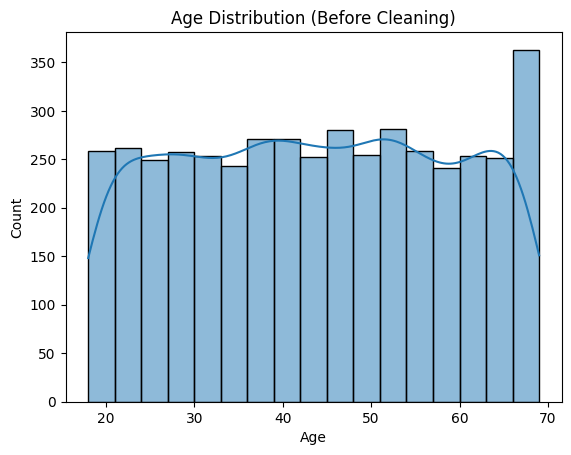

In [6]:
# Visualize before filling
sns.histplot(streaming_data_copy['Age'], kde=True, binwidth=3)
plt.title('Age Distribution (Before Cleaning)')
plt.xlabel('Age')
plt.show()

In [7]:
# View missing values and data type
print(f"Age Contains {streaming_data_copy['Age'].isna().sum()} Missing Values")

Age Contains 500 Missing Values


In [8]:
# Fill missing values with median
age_median = streaming_data_copy['Age'].median()
streaming_data_copy['Age'].fillna(age_median, inplace=True)

In [9]:
# Convert from float to int
streaming_data_copy['Age'] = streaming_data_copy['Age'].astype(int)

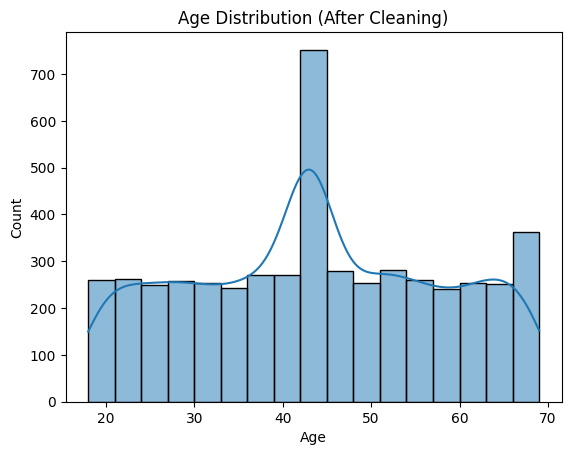

In [10]:
# Plot after filling
sns.histplot(streaming_data_copy['Age'], kde=True, binwidth=3)
plt.title('Age Distribution (After Cleaning)')
plt.xlabel('Age')
plt.show()

In [11]:
# View missing values and data type
print(f"Age Contains {streaming_data_copy['Age'].isna().sum()} Missing Values")

Age Contains 0 Missing Values


#### Cleaning the Satisfacton Score Column

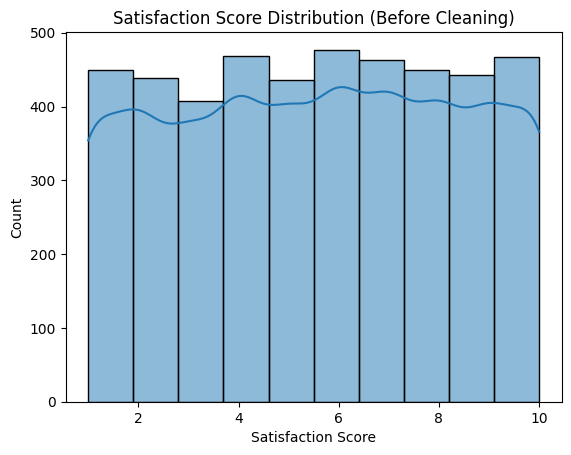

In [12]:
# Step 1: Visualize Satisfaction Score before cleaning
sns.histplot(streaming_data_copy['Satisfaction_Score'], kde=True, bins=10)
plt.title('Satisfaction Score Distribution (Before Cleaning)')
plt.xlabel('Satisfaction Score')
plt.show()

In [13]:
# Step 2: Check how many values are missing
missing_satisfaction_score = streaming_data_copy['Satisfaction_Score'].isna().sum()
print(f"The Satisfaction Score Contains {missing_satisfaction_score} Missing Values")

The Satisfaction Score Contains 500 Missing Values


In [14]:
# Step 3: Fill missing values with median
satisfaction_median = streaming_data_copy['Satisfaction_Score'].median()
streaming_data_copy['Satisfaction_Score'].fillna(satisfaction_median, inplace=True)

In [15]:
# Step 4: Convert to int
streaming_data_copy['Satisfaction_Score'] = streaming_data_copy['Satisfaction_Score'].astype(int)

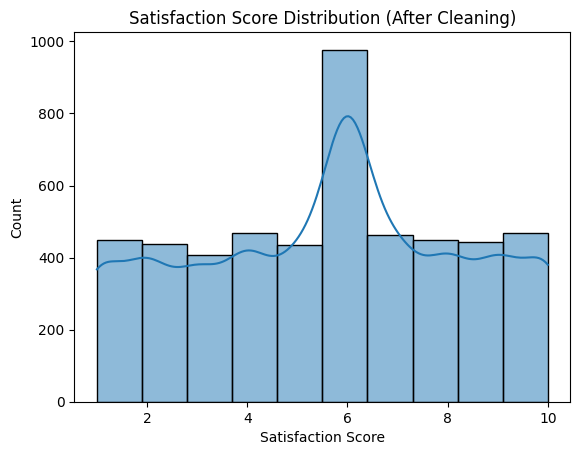

In [16]:
# Step 5: Visualize after cleaning
sns.histplot(streaming_data_copy['Satisfaction_Score'], kde=True, bins=10)
plt.title('Satisfaction Score Distribution (After Cleaning)')
plt.xlabel('Satisfaction Score')
plt.show()

In [17]:
# Step 6: Confirm no missing values
print(f"The Satisfaction Score Contains {streaming_data_copy['Satisfaction_Score'].isna().sum()} Missing Values")

The Satisfaction Score Contains 0 Missing Values


In [18]:
# Viewing the cleaned data
streaming_data_copy

Customer_ID  Age  Gender  Subscription_Length Region Payment_Method  \
0     CUST000001   56    Male                   54  South         PayPal   
1     CUST000002   69  Female                   21   East     Debit Card   
2     CUST000003   46  Female                   49   East         PayPal   
3     CUST000004   32    Male                   47   West     Debit Card   
4     CUST000005   60    Male                    6   East    Credit Card   
...          ...  ...     ...                  ...    ...            ...   
4995  CUST004996   24    Male                    5   East     Debit Card   
4996  CUST004997   66  Female                   12   East         PayPal   
4997  CUST004998   26  Female                    1   East    Credit Card   
4998  CUST004999   53  Female                   44  South     Debit Card   
4999  CUST005000   36  Female                   22   East     Debit Card   

      Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
0                          0                   9              6.42   
1                          1                   2             13.77   
2                          3                   8             19.91   
3                          3                   1             13.39   
4                          2                   6             13.18   
...                      ...                 ...               ...   
4995                       0                   8             18.03   
4996                       3                   5              5.84   
4997                       2                   8              6.76   
4998                       1                  10              5.95   
4999                       1                   8             11.36   

      Last_Activity  Monthly_Spend  Churned  
0               319          62.11        1  
1               166          37.27        1  
2               207          61.82        0  
3               108          40.96        1  
4                65          45.97        0  
...             ...            ...      ...  
4995            121          51.61        0  
4996            192          36.32        0  
4997            354          42.07        1  
4998             31          60.09        0  
4999            357          49.48        1  

[5000 rows x 12 columns]

### 1A
Compare regression models that predict "Monthly Spend" based on a single numerical input 
feature. Based on your results, which numerical variable in the dataset is the best predictor of 
Monthly Spend and why? For each numerical input feature, does Monthly Spend fit better with 
a linear model or a non-linear model (e.g., polynomial regression)?

#### Simple Linear Regression

In [19]:
def run_simple_linear_models(df, features, target="Monthly_Spend", test_size=0.2, random_state=42):
    """
    For each numerical feature, this function trains a simple linear regression model
    to predict the target variable. It prints error metrics and plots a regression line.
    """

    for feature in features:
        print("="*50)
        print(f"Feature: {feature}\n")

        # Step 1: Prepare the input and target
        X = df[[feature]].values
        y = df[target].values

        # Step 2: Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Step 3: Scale input feature
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Step 4: Train Linear Regression
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        gradient = model.coef_[0]
        intercept = model.intercept_
        print(f"Model Equation: y = {gradient:.2f}x + {intercept:.2f}")


        # Step 5: Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f"MAE:  {mae:.2f}")
        print(f"MSE:  {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R²:   {r2:.4f}")
        print(f"Model: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

        # Step 6: Plot
        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_range_scaled = scaler.transform(X_range)
        y_range_pred = model.predict(X_range_scaled)

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=X.flatten(), y=y, alpha=0.3, label="Data Points")
        plt.plot(X_range, y_range_pred, color="red", label="Regression Line")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"{feature} vs {target}")
        plt.legend()
        plt.tight_layout()
        plt.show()


Feature: Age

Model Equation: y = 0.00x + 46.56
MAE:  7.64
MSE:  90.48
RMSE: 9.51
R²:   -0.0009
Model: y = 0.00x + 46.56


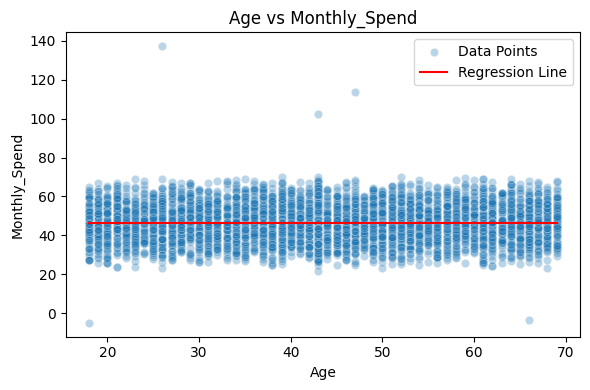

Feature: Subscription_Length

Model Equation: y = 5.24x + 46.56
MAE:  6.64
MSE:  64.83
RMSE: 8.05
R²:   0.2829
Model: y = 5.24x + 46.56


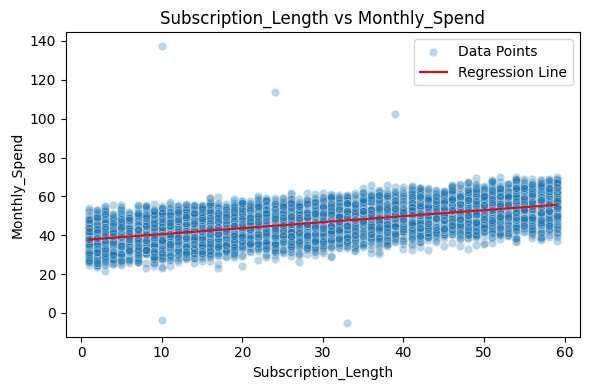

Feature: Support_Tickets_Raised

Model Equation: y = -1.58x + 46.56
MAE:  7.60
MSE:  88.80
RMSE: 9.42
R²:   0.0178
Model: y = -1.58x + 46.56


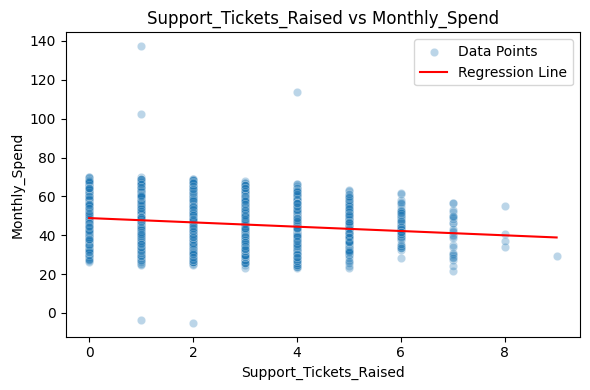

Feature: Satisfaction_Score

Model Equation: y = 6.85x + 46.56
MAE:  5.16
MSE:  42.08
RMSE: 6.49
R²:   0.5345
Model: y = 6.85x + 46.56


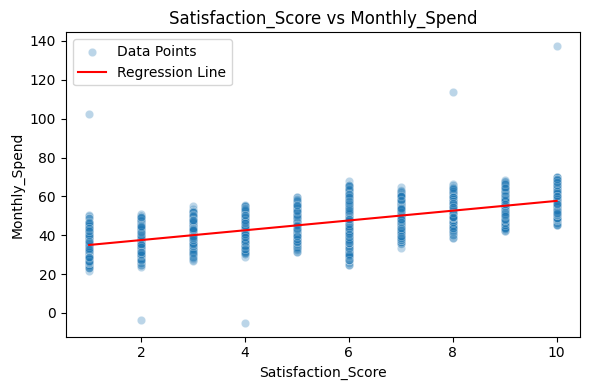

Feature: Discount_Offered

Model Equation: y = 2.06x + 46.56
MAE:  7.42
MSE:  86.37
RMSE: 9.29
R²:   0.0446
Model: y = 2.06x + 46.56


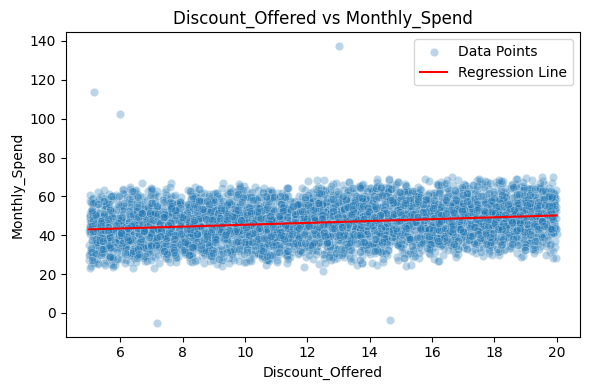

Feature: Last_Activity

Model Equation: y = -0.02x + 46.56
MAE:  7.64
MSE:  90.49
RMSE: 9.51
R²:   -0.0010
Model: y = -0.02x + 46.56


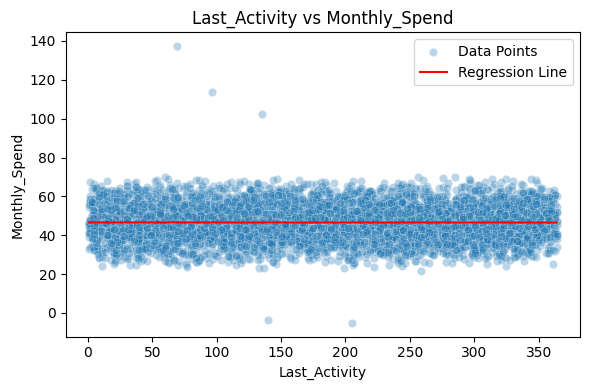

In [20]:
# List of features 
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

# Call the Function
run_simple_linear_models(streaming_data_copy, numerical_features)


#### Polynomial Regression

In [21]:
def run_polynomial_models_all_features(df, features, target="Monthly_Spend", degrees=range(2, 6), test_size=0.2, random_state=42):
    """
    Fits polynomial regression models (degrees 2 to 5) for each numerical feature to predict the target.
    Prints evaluation metrics and plots fitted curves.
    """

    for feature in features:
        print("=" * 70)
        print(f"Polynomial Regression for Feature: {feature}")

        X = df[[feature]].values
        y = df[target].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        # Scale input
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for degree in degrees:
            print(f"\n Polynomial Degree: {degree}")

            # Create polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_train_poly = poly.fit_transform(X_train_scaled)
            X_test_poly = poly.transform(X_test_scaled)

            # Train model
            model = LinearRegression()
            model.fit(X_train_poly, y_train)
            y_pred = model.predict(X_test_poly)

            # Metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            print(f"MAE : {mae:.2f}")
            print(f"MSE : {mse:.2f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"R²  : {r2:.4f}")

            # Plot
            X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            X_range_scaled = scaler.transform(X_range)
            X_range_poly = poly.transform(X_range_scaled)
            y_range_pred = model.predict(X_range_poly)

            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=X.flatten(), y=y, alpha=0.3, label="Data")
            plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree} Fit")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.title(f"{feature} vs {target} (Degree {degree})")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(f"{feature}_poly_deg{degree}.png", dpi=300)
            plt.show()

        print("\n")


Polynomial Regression for Feature: Age

 Polynomial Degree: 2
MAE : 7.64
MSE : 90.47
RMSE: 9.51
R²  : -0.0008


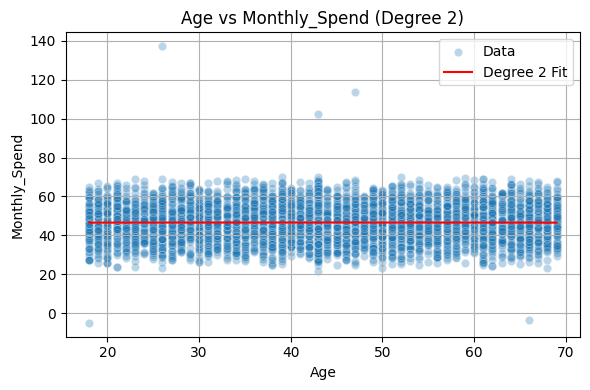


 Polynomial Degree: 3
MAE : 7.65
MSE : 90.87
RMSE: 9.53
R²  : -0.0052


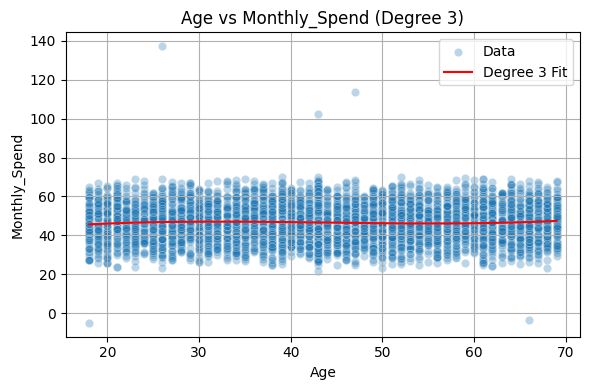


 Polynomial Degree: 4
MAE : 7.66
MSE : 90.92
RMSE: 9.53
R²  : -0.0057


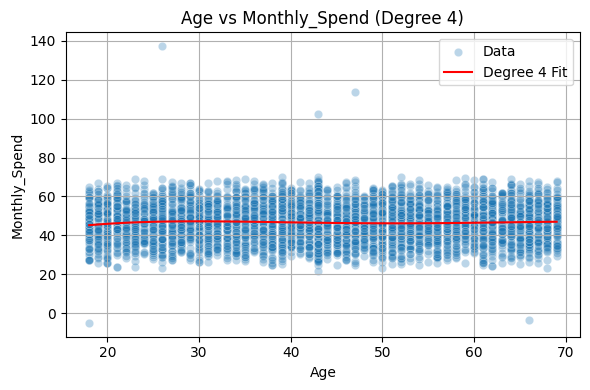


 Polynomial Degree: 5
MAE : 7.66
MSE : 90.91
RMSE: 9.53
R²  : -0.0057


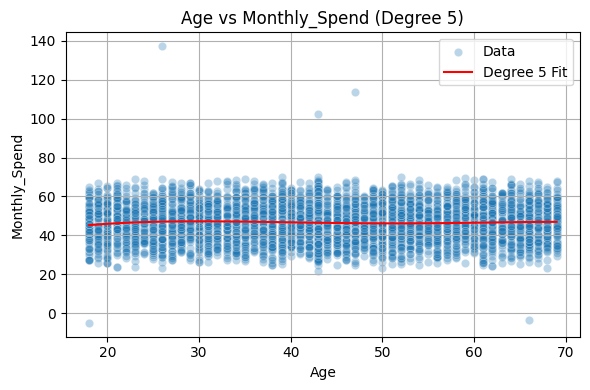



Polynomial Regression for Feature: Subscription_Length

 Polynomial Degree: 2
MAE : 6.65
MSE : 64.91
RMSE: 8.06
R²  : 0.2820


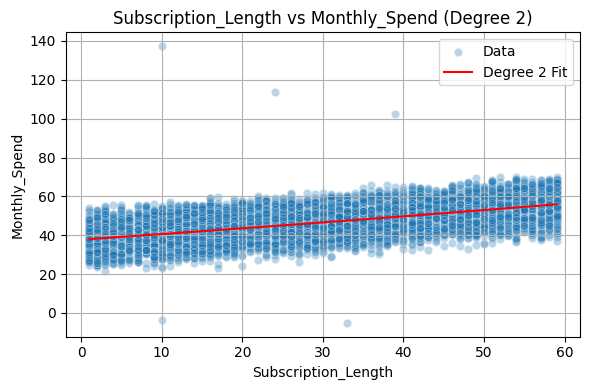


 Polynomial Degree: 3
MAE : 6.65
MSE : 64.99
RMSE: 8.06
R²  : 0.2811


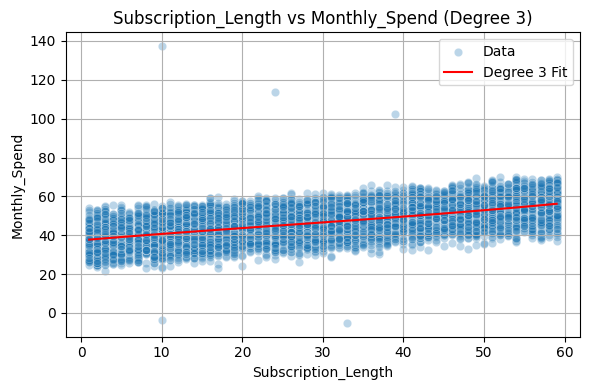


 Polynomial Degree: 4
MAE : 6.65
MSE : 65.01
RMSE: 8.06
R²  : 0.2809


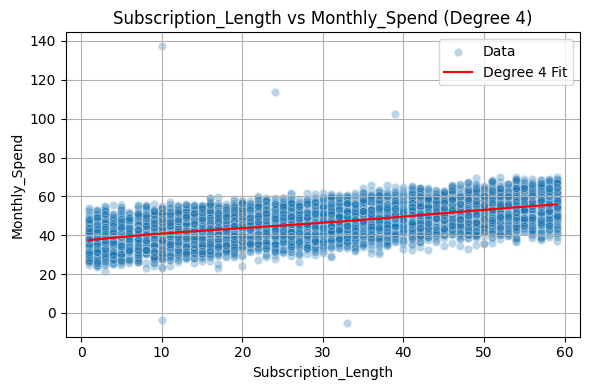


 Polynomial Degree: 5
MAE : 6.66
MSE : 65.04
RMSE: 8.06
R²  : 0.2805


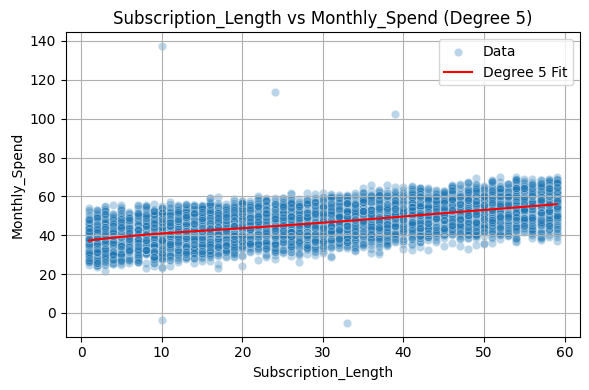



Polynomial Regression for Feature: Support_Tickets_Raised

 Polynomial Degree: 2
MAE : 7.61
MSE : 88.92
RMSE: 9.43
R²  : 0.0164


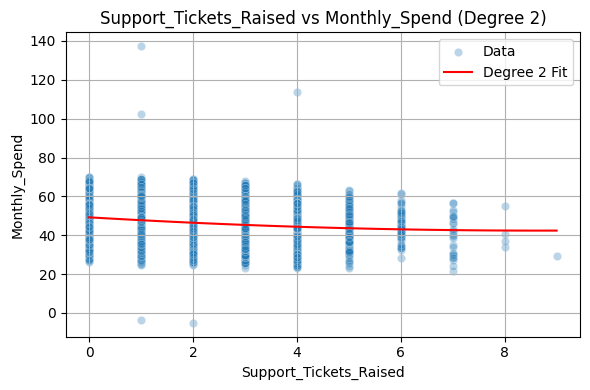


 Polynomial Degree: 3
MAE : 7.61
MSE : 88.96
RMSE: 9.43
R²  : 0.0159


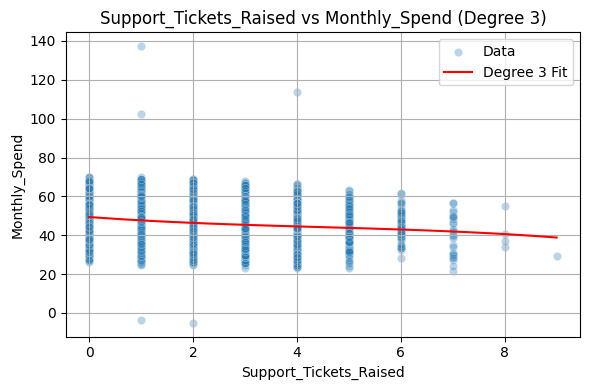


 Polynomial Degree: 4
MAE : 7.60
MSE : 88.86
RMSE: 9.43
R²  : 0.0171


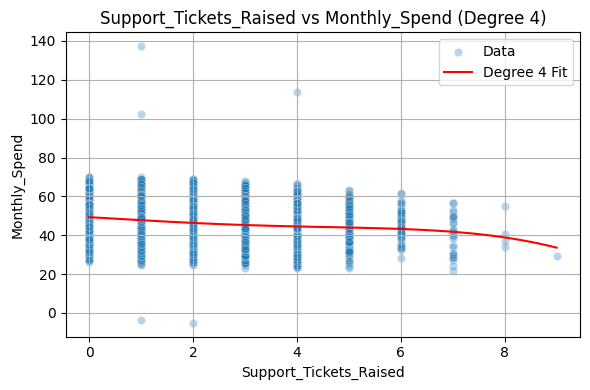


 Polynomial Degree: 5
MAE : 7.60
MSE : 88.86
RMSE: 9.43
R²  : 0.0170


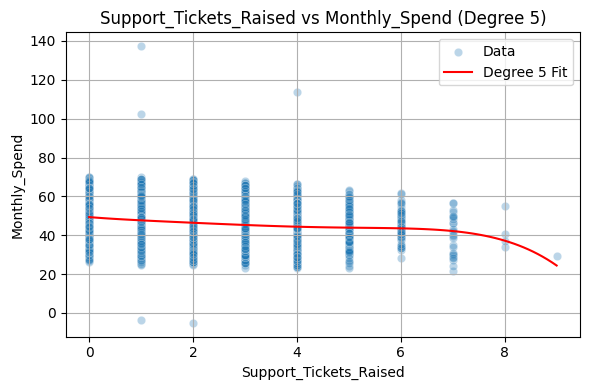



Polynomial Regression for Feature: Satisfaction_Score

 Polynomial Degree: 2
MAE : 5.16
MSE : 42.08
RMSE: 6.49
R²  : 0.5345


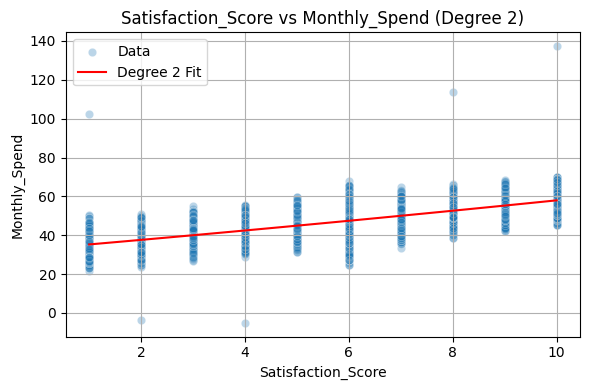


 Polynomial Degree: 3
MAE : 5.16
MSE : 42.10
RMSE: 6.49
R²  : 0.5343


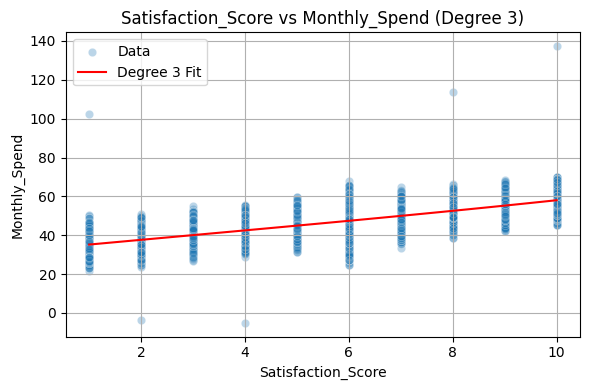


 Polynomial Degree: 4
MAE : 5.16
MSE : 42.12
RMSE: 6.49
R²  : 0.5341


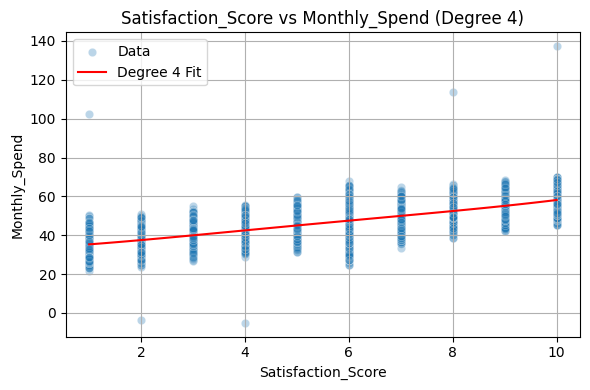


 Polynomial Degree: 5
MAE : 5.16
MSE : 42.14
RMSE: 6.49
R²  : 0.5338


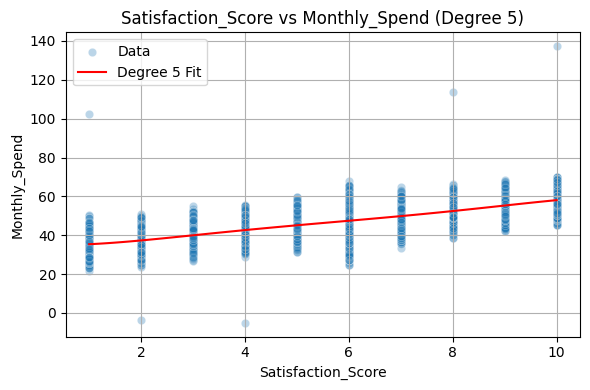



Polynomial Regression for Feature: Discount_Offered

 Polynomial Degree: 2
MAE : 7.42
MSE : 86.37
RMSE: 9.29
R²  : 0.0446


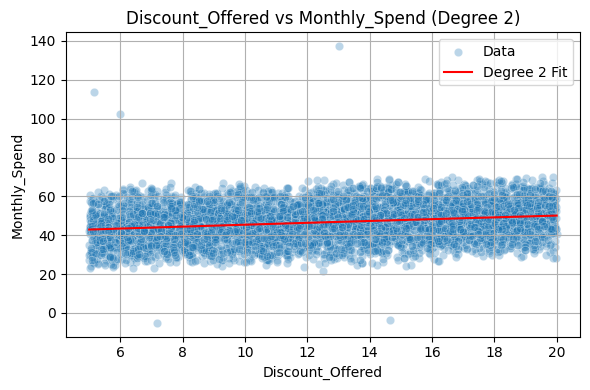


 Polynomial Degree: 3
MAE : 7.42
MSE : 86.41
RMSE: 9.30
R²  : 0.0441


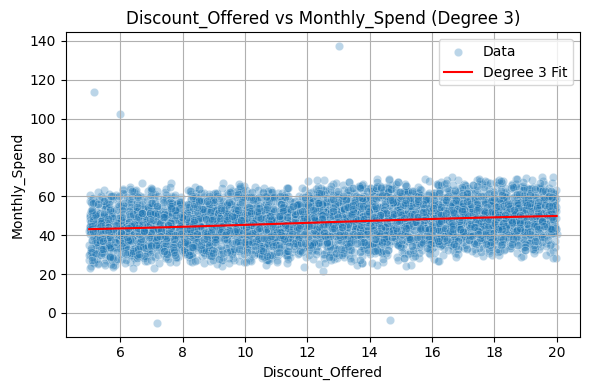


 Polynomial Degree: 4
MAE : 7.42
MSE : 86.42
RMSE: 9.30
R²  : 0.0441


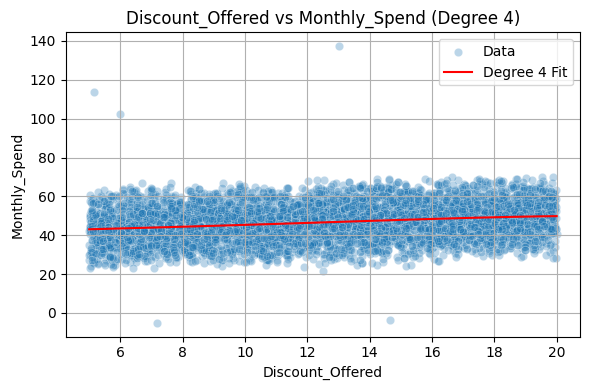


 Polynomial Degree: 5
MAE : 7.42
MSE : 86.29
RMSE: 9.29
R²  : 0.0454


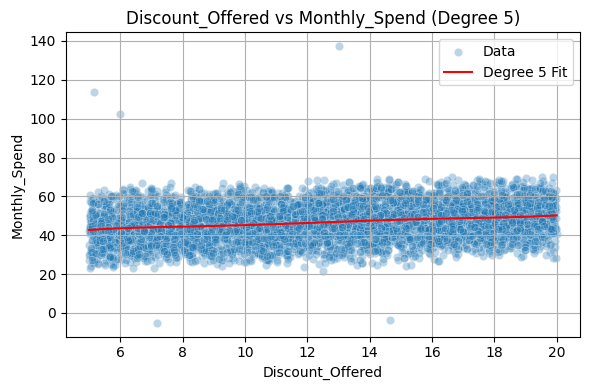



Polynomial Regression for Feature: Last_Activity

 Polynomial Degree: 2
MAE : 7.64
MSE : 90.48
RMSE: 9.51
R²  : -0.0009


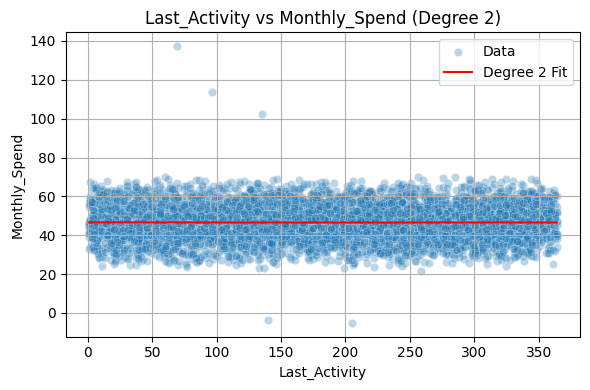


 Polynomial Degree: 3
MAE : 7.64
MSE : 90.54
RMSE: 9.52
R²  : -0.0015


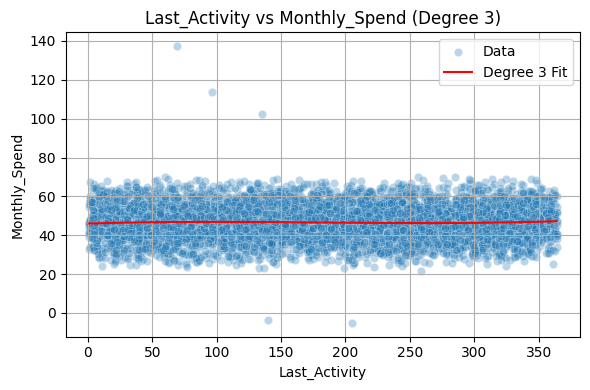


 Polynomial Degree: 4
MAE : 7.65
MSE : 90.53
RMSE: 9.51
R²  : -0.0015


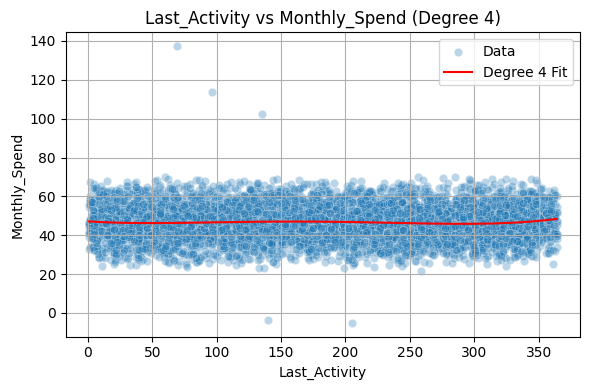


 Polynomial Degree: 5
MAE : 7.65
MSE : 90.58
RMSE: 9.52
R²  : -0.0020


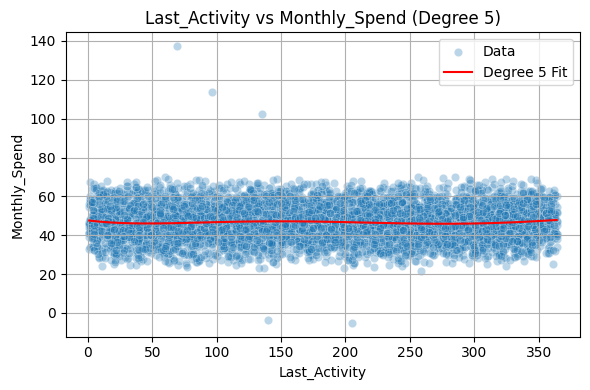

In [22]:
# List of features 
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

# Call the Function
run_polynomial_models_all_features(streaming_data_copy, numerical_features)


## 1B
Consider regression models that take multiple numerical variables as input features to 
predict "Monthly Spend". Does including multiple features improve prediction accuracy 
compared to single-variable models from part (a)?

#### Multiple Linear Regression (Numerical features)

In [23]:
def run_my_multiple_linear_regression(df, feature_names, target="Monthly_Spend", test_size=0.2, random_state=42):
    """
    Runs a Multiple Linear Regression using the specified features to predict the target variable.
    Includes model fitting, coefficient output, evaluation metrics, and a saved prediction plot.

    Parameters:
        df (DataFrame): Cleaned dataset
        feature_names (list): List of feature column names
        target (str): Name of the target variable column
        test_size (float): Proportion of dataset for testing
        random_state (int): Reproducibility seed
    """
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    print("=" * 70)
    print(f" Running Multiple Linear Regression on features:\n{feature_names}\n")

    # 1. Extract features and target
    X = df[feature_names]
    y = df[target]

    # 2. Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size : {len(X_test)}")

    # 3. Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # 5. Print model coefficients
    print("\n Model Coefficients:")
    for i, feature in enumerate(feature_names):
        print(f"   {feature}: {model.coef_[i]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")

    # 6. Predict and evaluate
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\n Evaluation Metrics (Test Set):")
    print(f"   MAE : {mae:.2f}")
    print(f"   MSE : {mse:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R²  : {r2:.4f}")

    # 7. Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='black', label='Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit Line')
    plt.xlabel("Actual Monthly Spend")
    plt.ylabel("Predicted Monthly Spend")
    plt.title("Actual vs Predicted - Multiple Linear Regression")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.savefig("multiple_linear_regression_plot.png", dpi=600)
    plt.show()
    plt.close()


 Running Multiple Linear Regression on features:
['Age', 'Subscription_Length', 'Support_Tickets_Raised', 'Satisfaction_Score', 'Discount_Offered', 'Last_Activity']

Training set size: 4000
Testing set size : 1000

 Model Coefficients:
   Age: 0.0052
   Subscription_Length: 5.1456
   Support_Tickets_Raised: -1.7647
   Satisfaction_Score: 6.8049
   Discount_Offered: 2.1159
   Last_Activity: -0.0690
Intercept: 46.5629

 Evaluation Metrics (Test Set):
   MAE : 1.36
   MSE : 10.29
   RMSE: 3.21
   R²  : 0.8861


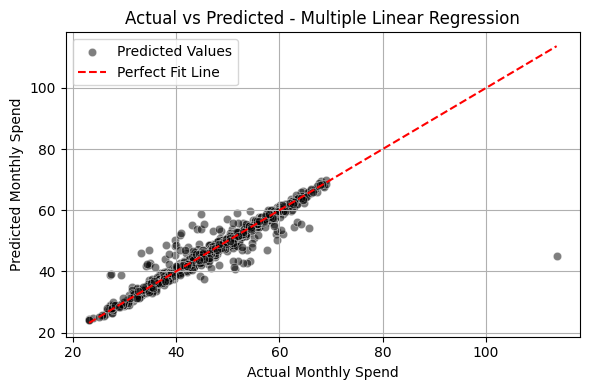

In [24]:
feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                 "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

run_my_multiple_linear_regression(streaming_data_copy, feature_names)


#### Random Forest Regression (Numerical Features)

In [25]:
def run_random_forest_regression(df, feature_names, target="Monthly_Spend", test_size=0.2, random_state=42):
    """
    Trains and evaluates a Random Forest Regressor using the specified features.
    Prints evaluation metrics and saves a plot comparing actual vs predicted values.

    Parameters:
        df (DataFrame): The dataset
        feature_names (list): List of column names to use as features
        target (str): Name of the target column
        test_size (float): Test split proportion
        random_state (int): Random seed for reproducibility
    """

    print("=" * 70)
    print("Running Random Forest Regression on features:")
    print(feature_names)

    # Prepare data
    X = df[feature_names]
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Predict
    y_pred = rf_model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nEvaluation Metrics (Test Set):")
    print(f"   Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   Mean Squared Error (MSE): {mse:.2f}")
    print(f"   Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   R² Score: {r2:.4f}")

    # Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='darkgreen', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
    plt.xlabel("Actual Monthly Spend")
    plt.ylabel("Predicted Monthly Spend")
    plt.title("Actual vs Predicted - Random Forest Regression")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("random_forest_regression_plot.png", dpi=600)
    plt.show()
    plt.close()


Running Random Forest Regression on features:
['Age', 'Subscription_Length', 'Support_Tickets_Raised', 'Satisfaction_Score', 'Discount_Offered', 'Last_Activity']

Evaluation Metrics (Test Set):
   Mean Absolute Error (MAE): 1.80
   Mean Squared Error (MSE): 12.16
   Root Mean Squared Error (RMSE): 3.49
   R² Score: 0.8655


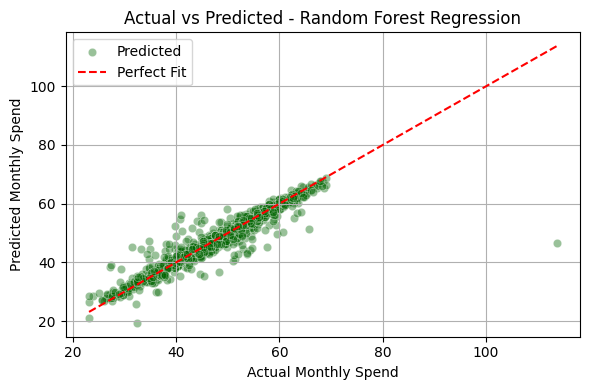

In [26]:
feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                 "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

run_random_forest_regression(streaming_data_copy, feature_names)


#### Neural Network Regression (Numerical Features)

In [27]:
def run_neural_network_regression(df, feature_names, target="Monthly_Spend", test_size=0.2, random_state=42, epochs=100, batch_size=32):
    """
    Trains and evaluates a simple neural network regressor (Keras Sequential API).
    Prints evaluation metrics and shows a predicted vs actual scatterplot.

    Parameters:
        df (DataFrame): Dataset
        feature_names (list): List of input feature columns
        target (str): Target variable name
        test_size (float): Train-test split ratio
        random_state (int): Seed for reproducibility
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
    """
    print("=" * 70)
    print("Running Neural Network Regression...")

    X = df[feature_names]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build neural network
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mse')

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train model
    history = model.fit(X_train_scaled, y_train, 
                        validation_split=0.2, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        callbacks=[early_stop],
                        verbose=0)

    # Predict
    y_pred = model.predict(X_test_scaled).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nEvaluation Metrics (Test Set):")
    print(f"   MAE : {mae:.2f}")
    print(f"   MSE : {mse:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R²  : {r2:.4f}")

    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='purple', label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
    plt.xlabel("Actual Monthly Spend")
    plt.ylabel("Predicted Monthly Spend")
    plt.title("Actual vs Predicted - Neural Network Regression")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("neural_network_regression_plot.png", dpi=600)
    plt.show()
    plt.close()


Running Neural Network Regression...


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step

Evaluation Metrics (Test Set):
   MAE : 1.51
   MSE : 10.87
   RMSE: 3.30
   R²  : 0.8797


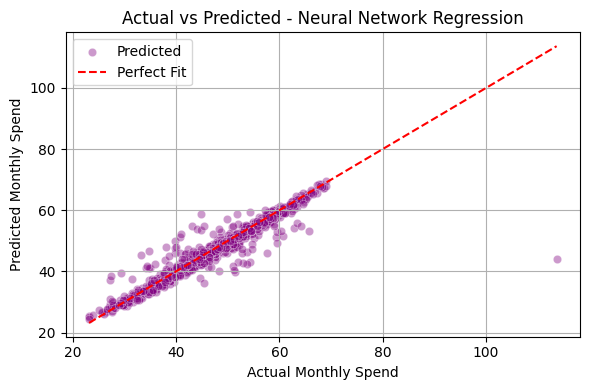

In [28]:
feature_names = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                 "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

run_neural_network_regression(streaming_data_copy, feature_names)


## 1c
 In parts (a) and (b), you only considered numerical variables as input. However, several 
categorical variables (e.g., Gender, Region, Payment_Method) might also affect Monthly 
Spend. Now train a regression model that uses both categorical and numerical variables (e.g., 
a Random Forest Regressor). Does this improve the model’s performance? 

#### c. Random Forest Regression (Categorical and Numerical features)

In [29]:
def run_random_forest_mixed_features(df, numerical_features, categorical_features, target="Monthly_Spend", test_size=0.2, random_state=42):
    """
    Trains a Random Forest Regressor using both numerical and categorical features.
    Evaluates performance and shows feature importance.

    Parameters:
        df (DataFrame): Input dataset
        numerical_features (list): Column names for numerical features
        categorical_features (list): Column names for categorical features
        target (str): Target variable name
        test_size (float): Proportion of test data
        random_state (int): Random seed for reproducibility
    """
    # Prepare input and target
    X = df[numerical_features + categorical_features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size : {len(X_test)}")

    # Preprocessor for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ]
    )

    # Pipeline with Random Forest
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=random_state))
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nEvaluation Metrics:")
    print(f"   MAE : {mae:.2f}")
    print(f"   MSE : {mse:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   R²  : {r2:.4f}")

    # Feature Importance
    rf_model = pipeline.named_steps['regressor']
    cat_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
    feature_names = numerical_features + list(cat_names)

    importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title("Random Forest Feature Importance")
    plt.tight_layout()
    plt.savefig("rf_mixed_feature_importance.png", dpi=600)
    plt.show()
    plt.close()
    


Training set size: 4000
Testing set size : 1000

Evaluation Metrics:
   MAE : 1.82
   MSE : 12.06
   RMSE: 3.47
   R²  : 0.8666


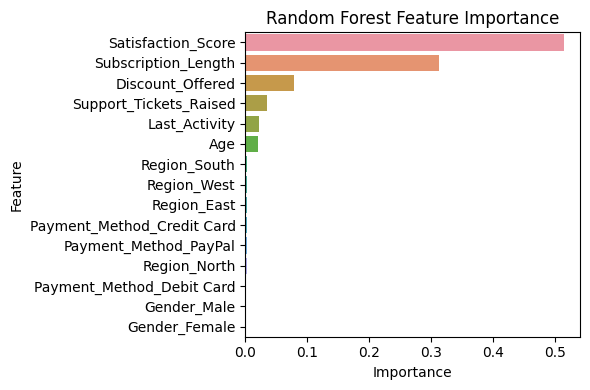

In [30]:
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

categorical_features = ["Gender", "Region", "Payment_Method"]

run_random_forest_mixed_features(streaming_data_copy, numerical_features, categorical_features)


## 1D
Develop an Artificial Neural Network (ANN) model to predict Monthly Spend based on all 
available features in the dataset. How does its performance compare to other supervised 
learning models? Discuss your neural network architecture, hyperparameter tuning, and 
optimization choices.

### Model 1

##### Preprocess the Data (Numerical + Categorical) and build the ANN model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

# Define numerical and categorical features
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
categorical_features = ["Gender", "Region", "Payment_Method"]
all_features = numerical_features + categorical_features
target = "Monthly_Spend"

# Prepare input and target
X = streaming_data_copy[all_features]
y = streaming_data_copy[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: scale numerical + one-hot encode categorical
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
])

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Store number of features for the input layer
input_shape = X_train_processed.shape[1]

# Build the ANN model
model = Sequential()
model.add(Input(shape=(input_shape,)))      # Input layer
model.add(Dense(64, activation='relu'))     # Hidden layer 1
model.add(Dropout(0.2))                      # Dropout to reduce overfitting
model.add(Dense(64, activation='relu'))     # Hidden layer 2
model.add(Dense(1, activation='linear'))    # Output layer for regression

# Show model structure
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model with Adam optimizer and MSE loss
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_squared_error', 'mean_absolute_error']
)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)


In [33]:
print(model)
print(X_train_processed)
print(y_train)

<Sequential name=sequential_1, built=True>
[[0.50980392 0.96551724 0.125      ... 0.         0.         0.        ]
 [0.05882353 0.89655172 0.125      ... 1.         0.         0.        ]
 [0.17647059 0.32758621 0.375      ... 0.         0.         1.        ]
 ...
 [0.64705882 0.20689655 0.125      ... 0.         0.         1.        ]
 [0.01960784 0.75862069 0.375      ... 1.         1.         0.        ]
 [0.49019608 0.98275862 0.25       ... 1.         0.         0.        ]]
4227    39.04
4676    60.74
800     51.74
3671    40.70
4193    48.71
        ...  
4426    39.69
466     33.47
3092    52.80
3772    56.67
860     48.81
Name: Monthly_Spend, Length: 4000, dtype: float64


In [34]:
# Import the EarlyStopping class from Keras
from keras.callbacks import EarlyStopping
# Define the early stopping criterion. We will
# monitor the Validation Loss, and we will use
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20 , restore_best_weights=True)
# Train the model. Note that we record the return value
# from the fit() command in the variable called history.
# this will allow us to plot how the losses varied with
# epoch while the model was being trained.
# Fit the model with early stopping
history = model.fit(
    X_train_processed,
    y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1881.3328 - mean_absolute_error: 41.5576 - mean_squared_error: 1881.3328 - val_loss: 101.7162 - val_mean_absolute_error: 8.1919 - val_mean_squared_error: 101.7162
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 101.7824 - mean_absolute_error: 8.0015 - mean_squared_error: 101.7824 - val_loss: 50.6184 - val_mean_absolute_error: 5.6832 - val_mean_squared_error: 50.6184
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 68.3597 - mean_absolute_error: 6.1933 - mean_squared_error: 68.3597 - val_loss: 23.3510 - val_mean_absolute_error: 3.7962 - val_mean_squared_error: 23.3510
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 33.7021 - mean_absolute_error: 4.4111 - mean_squared_error: 33.7021 - val_loss: 11.6341 - val_mean_absolute_error: 2.4472 - val_mean_squared_error: 11.6341
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 30.2557 - mean_absolute_error: 3.7187 - mean_squared_e

##### Test Evaluation and making predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
Neural Network Test Evaluation:
  MAE  (Mean Absolute Error): 1.41
  MSE  (Mean Squared Error): 10.46
  RMSE (Root Mean Squared Error): 3.23
  R²   (R-squared Score): 0.8843


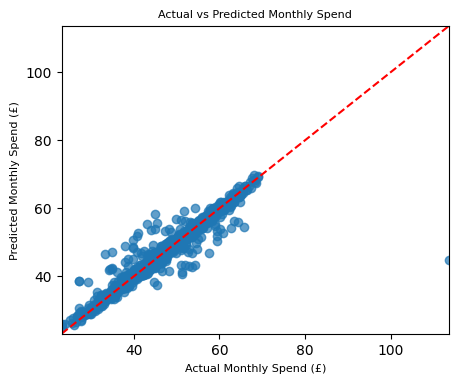

In [35]:
# Step 1: Make predictions on the test set
y_pred = model.predict(X_test_processed).flatten()

# Step 2: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Step 3: Print the results
print("Neural Network Test Evaluation:")
print(f"  MAE  (Mean Absolute Error): {mae:.2f}")
print(f"  MSE  (Mean Squared Error): {mse:.2f}")
print(f"  RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"  R²   (R-squared Score): {r2:.4f}")

# Step 4 :Plot predicted vs. actual monthly spend
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Monthly Spend (£)", fontsize=8)
plt.ylabel("Predicted Monthly Spend (£)", fontsize=8)
plt.title('Actual vs Predicted Monthly Spend', fontsize=8)
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.savefig("ANN_Predicted_vs_Actual.png", dpi=600)
plt.show()
plt.close()

##### Training vs. validation loss 

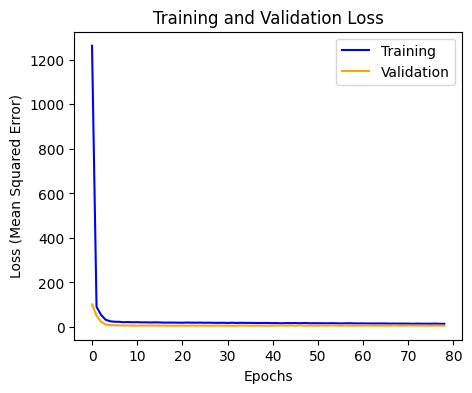

In [36]:
# Plot training and validation loss over time
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(5, 4))
plt.plot(history_df["loss"], label="Training", color='blue')
plt.plot(history_df["val_loss"], label="Validation", color='orange')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss (Mean Squared Error)")
plt.title('Training and Validation Loss')
plt.savefig("ANN_Loss_Curve.png", dpi=600)
plt.show()
plt.close()

The model's loss on both training and validation sets decreased steadily. There is no strong indication of overfitting, as validation loss did not increase while training loss decreased. The model stopped training after XX epochs due to early stopping, meaning further training did not lead to improvements.

### Model 2

##### This version adds a third hidden layer, uses tanh activation, 0.3 dropout, and a lower learning rate to test if deeper architecture improves accuracy.



In [37]:
no_of_features = X_train_processed.shape[1]

In [38]:

# Create a Sequential model (layer-by-layer architecture)
model_v2 = Sequential()

# Input layer based on number of features after preprocessing
model_v2.add(Input(shape=(no_of_features,)))

# Hidden Layer 1: 128 neurons with 'tanh' activation
model_v2.add(Dense(units=128, activation='tanh'))

# Dropout Layer: randomly drops 30% of inputs to prevent overfitting
model_v2.add(Dropout(0.3))

# Hidden Layer 2: 64 neurons with 'tanh' activation
model_v2.add(Dense(units=64, activation='tanh'))

# Hidden Layer 3: 32 neurons with 'tanh' activation
model_v2.add(Dense(units=32, activation='tanh'))

# Output Layer: 1 neuron for regression, linear activation
model_v2.add(Dense(units=1, activation='linear'))

# Print model structure
model_v2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Step 2: Compile the Model (choose optimizer + loss + metrics)
# -----------------------------------------------------

model_v2.compile(
    optimizer=Adam(learning_rate=0.0005),          # Lower learning rate than default
    loss='mean_squared_error',                     # Standard loss for regression
    metrics=['mean_squared_error', 'mean_absolute_error']  # Track additional metrics
)

# -----------------------------------------------------
# Step 3: Setup Early Stopping to Prevent Overtraining
# -----------------------------------------------------

early_stopping = EarlyStopping(
    monitor='val_loss',        # Watch validation loss
    patience=20,               # Stop if no improvement for 20 epochs
    restore_best_weights=True # Restore weights from the best epoch
)

In [40]:
# Step 4: Train the Model
# -----------------------------------------------------

history_v2 = model_v2.fit(
    X_train_processed,         # Training features
    y_train,                   # Training target
    validation_split=0.1,      # 10% of training set used for validation
    epochs=200,                # Max training epochs
    batch_size=32,             # Train in batches of 32
    callbacks=[early_stopping],
    verbose=1                  # Show training progress
)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1937.3740 - mean_absolute_error: 42.9334 - mean_squared_error: 1937.3740 - val_loss: 1569.7855 - val_mean_absolute_error: 38.5180 - val_mean_squared_error: 1569.7855
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1502.1733 - mean_absolute_error: 37.6071 - mean_squared_error: 1502.1733 - val_loss: 1411.6920 - val_mean_absolute_error: 36.4040 - val_mean_squared_error: 1411.6920
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 1331.2646 - mean_absolute_error: 35.2268 - mean_squared_error: 1331.2646 - val_loss: 1277.5629 - val_mean_absolute_error: 34.5117 - val_mean_squared_error: 1277.5629
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 1207.8278 - mean_absolute_error: 33.3968 - mean_squared_error: 1207.8278 - val_loss: 1156.5933 - val_mean_absolute_error: 32.7119 - val_mean_squared_error: 1156.5933
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 1102.2218 - mean_absolu

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


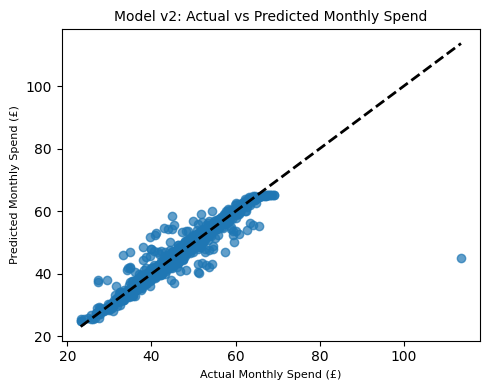

In [41]:
# Generate predictions on the test set
y_pred_v2 = model_v2.predict(X_test_processed)

# Create the scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_v2, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Customize the plot
plt.xlabel("Actual Monthly Spend (£)", fontsize=8)
plt.ylabel("Predicted Monthly Spend (£)", fontsize=8)
plt.title("Model v2: Actual vs Predicted Monthly Spend", fontsize=10)
plt.tight_layout()
plt.savefig("model_v2_actual_vs_predicted.png", dpi=600)
plt.show()

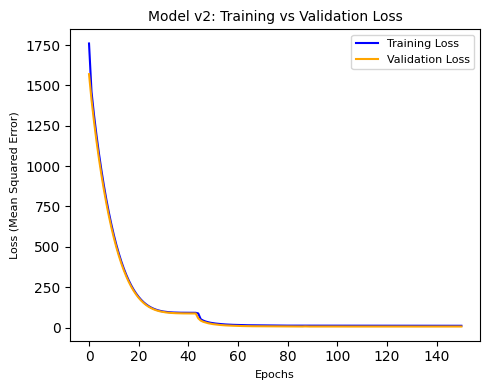

In [42]:
# Create a DataFrame from the training history
history_v2_df = pd.DataFrame(history_v2.history)

# Plot training and validation loss over epochs
plt.figure(figsize=(5, 4))
plt.plot(history_v2_df["loss"], label="Training Loss", color='blue')
plt.plot(history_v2_df["val_loss"], label="Validation Loss", color='orange')

# Customize the plot
plt.xlabel("Epochs", fontsize=8)
plt.ylabel("Loss (Mean Squared Error)", fontsize=8)
plt.title("Model v2: Training vs Validation Loss", fontsize=10)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("model_v2_training_validation_loss.png", dpi=600)
plt.show()


The predicted monthly spend values are now much closer to the actual values compared to the initial model. The scatter plot shows a strong alignment around the diagonal, indicating reduced bias in predictions. The training and validation loss curves also follow a consistent and stable trend, with no signs of overfitting. This time, the model achieved strong performance after just 146 epochs, thanks to the deeper architecture with three hidden layers and dropout.

In [43]:
# Evaluate on test data
results = model.evaluate(X_test_processed, y_test, verbose=0)

# Extract metrics
print(f"Test Loss (MSE): {results[0]:.4f}")
print(f"Test MAE: {results[1]:.4f}")
print(f"Test MSE (again): {results[2]:.4f}")


Test Loss (MSE): 10.4591
Test MAE: 10.4591
Test MSE (again): 1.4148


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test_processed)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
MAE  : 1.41
MSE  : 10.46
RMSE : 3.23
R²   : 0.8843


### Model 3
i. I will be varying the learning rate of the adam optimizer. The learning rate controls how rapidly the model parameters are updated with each epoch. The default learning rate is 0.001 in the Adam optimiser, so I will try 0.01

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# === Preprocessing ===
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# === Define optimizer with higher learning rate ===
adam_v3 = Adam(learning_rate=0.01)

# === Define model ===
model_v3 = Sequential()
model_v3.add(Input(shape=(X_train_scaled.shape[1],)))
model_v3.add(Dense(64, activation='relu'))
model_v3.add(Dropout(0.2))
model_v3.add(Dense(64, activation='relu'))
model_v3.add(Dense(64, activation='relu'))
model_v3.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [46]:
# === Compile model ===
model_v3.compile(optimizer=adam_v3, loss='mse', metrics=['mae', 'mse'])

# === Define early stopping ===
early_stop_v3 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# === Train model ===
history_v3 = model_v3.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=200,
    callbacks=[early_stop_v3],
    verbose=1
)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 570.1755 - mae: 17.1950 - mse: 570.1755 - val_loss: 14.9732 - val_mae: 2.9565 - val_mse: 14.9732
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 39.8655 - mae: 4.8371 - mse: 39.8655 - val_loss: 10.9370 - val_mae: 2.4354 - val_mse: 10.9370
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 30.9980 - mae: 4.0398 - mse: 30.9980 - val_loss: 10.9737 - val_mae: 2.4139 - val_mse: 10.9737
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 26.0899 - mae: 3.7214 - mse: 26.0899 - val_loss: 15.3905 - val_mae: 3.1509 - val_mse: 15.3905
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 25.0020 - mae: 3.3911 - mse: 25.0020 - val_loss: 8.7104 - val_mae: 2.0467 - val_mse: 8.7104
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 18.7974 - mae: 3.0410 - mse: 18.7974 - val_loss: 12.3839 - val_mae: 2.7568 - val_mse: 12.3839
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - lo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


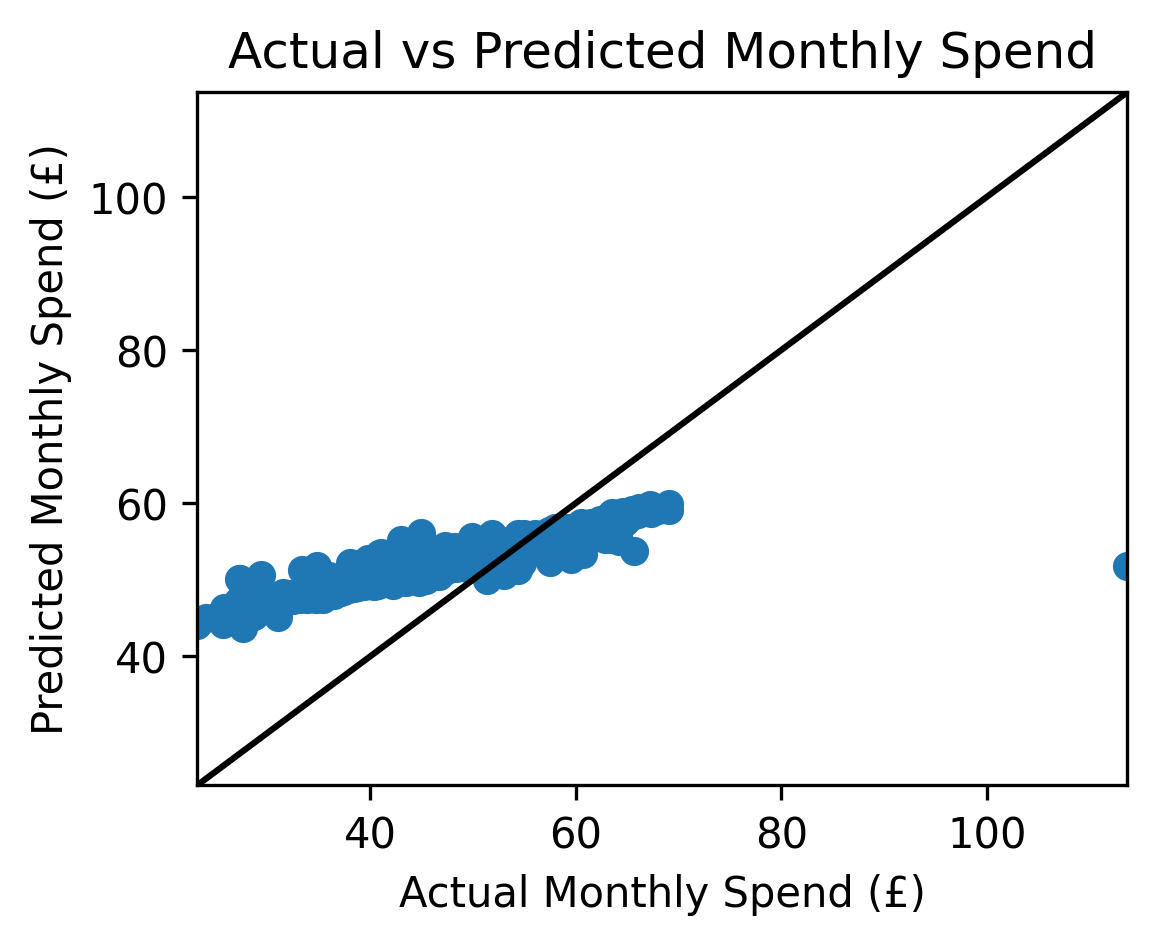

In [47]:
# Predict the model outputs for the testing set.
y_pred = model_v3.predict(X_test_processed)



# Start by creating a figure
plt.figure(figsize=(4, 3), dpi=300)

# Create a scatterplot comparing the predicted and actual values
plt.scatter(y_test, y_pred)

# Add a straight diagonal line (ideal prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-')

# Label both axes and add a title
plt.xlabel("Actual Monthly Spend (£)")
plt.ylabel("Predicted Monthly Spend (£)")
plt.title('Actual vs Predicted Monthly Spend')

# Limit the range of values on both axes
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

# Show the plot
plt.show()


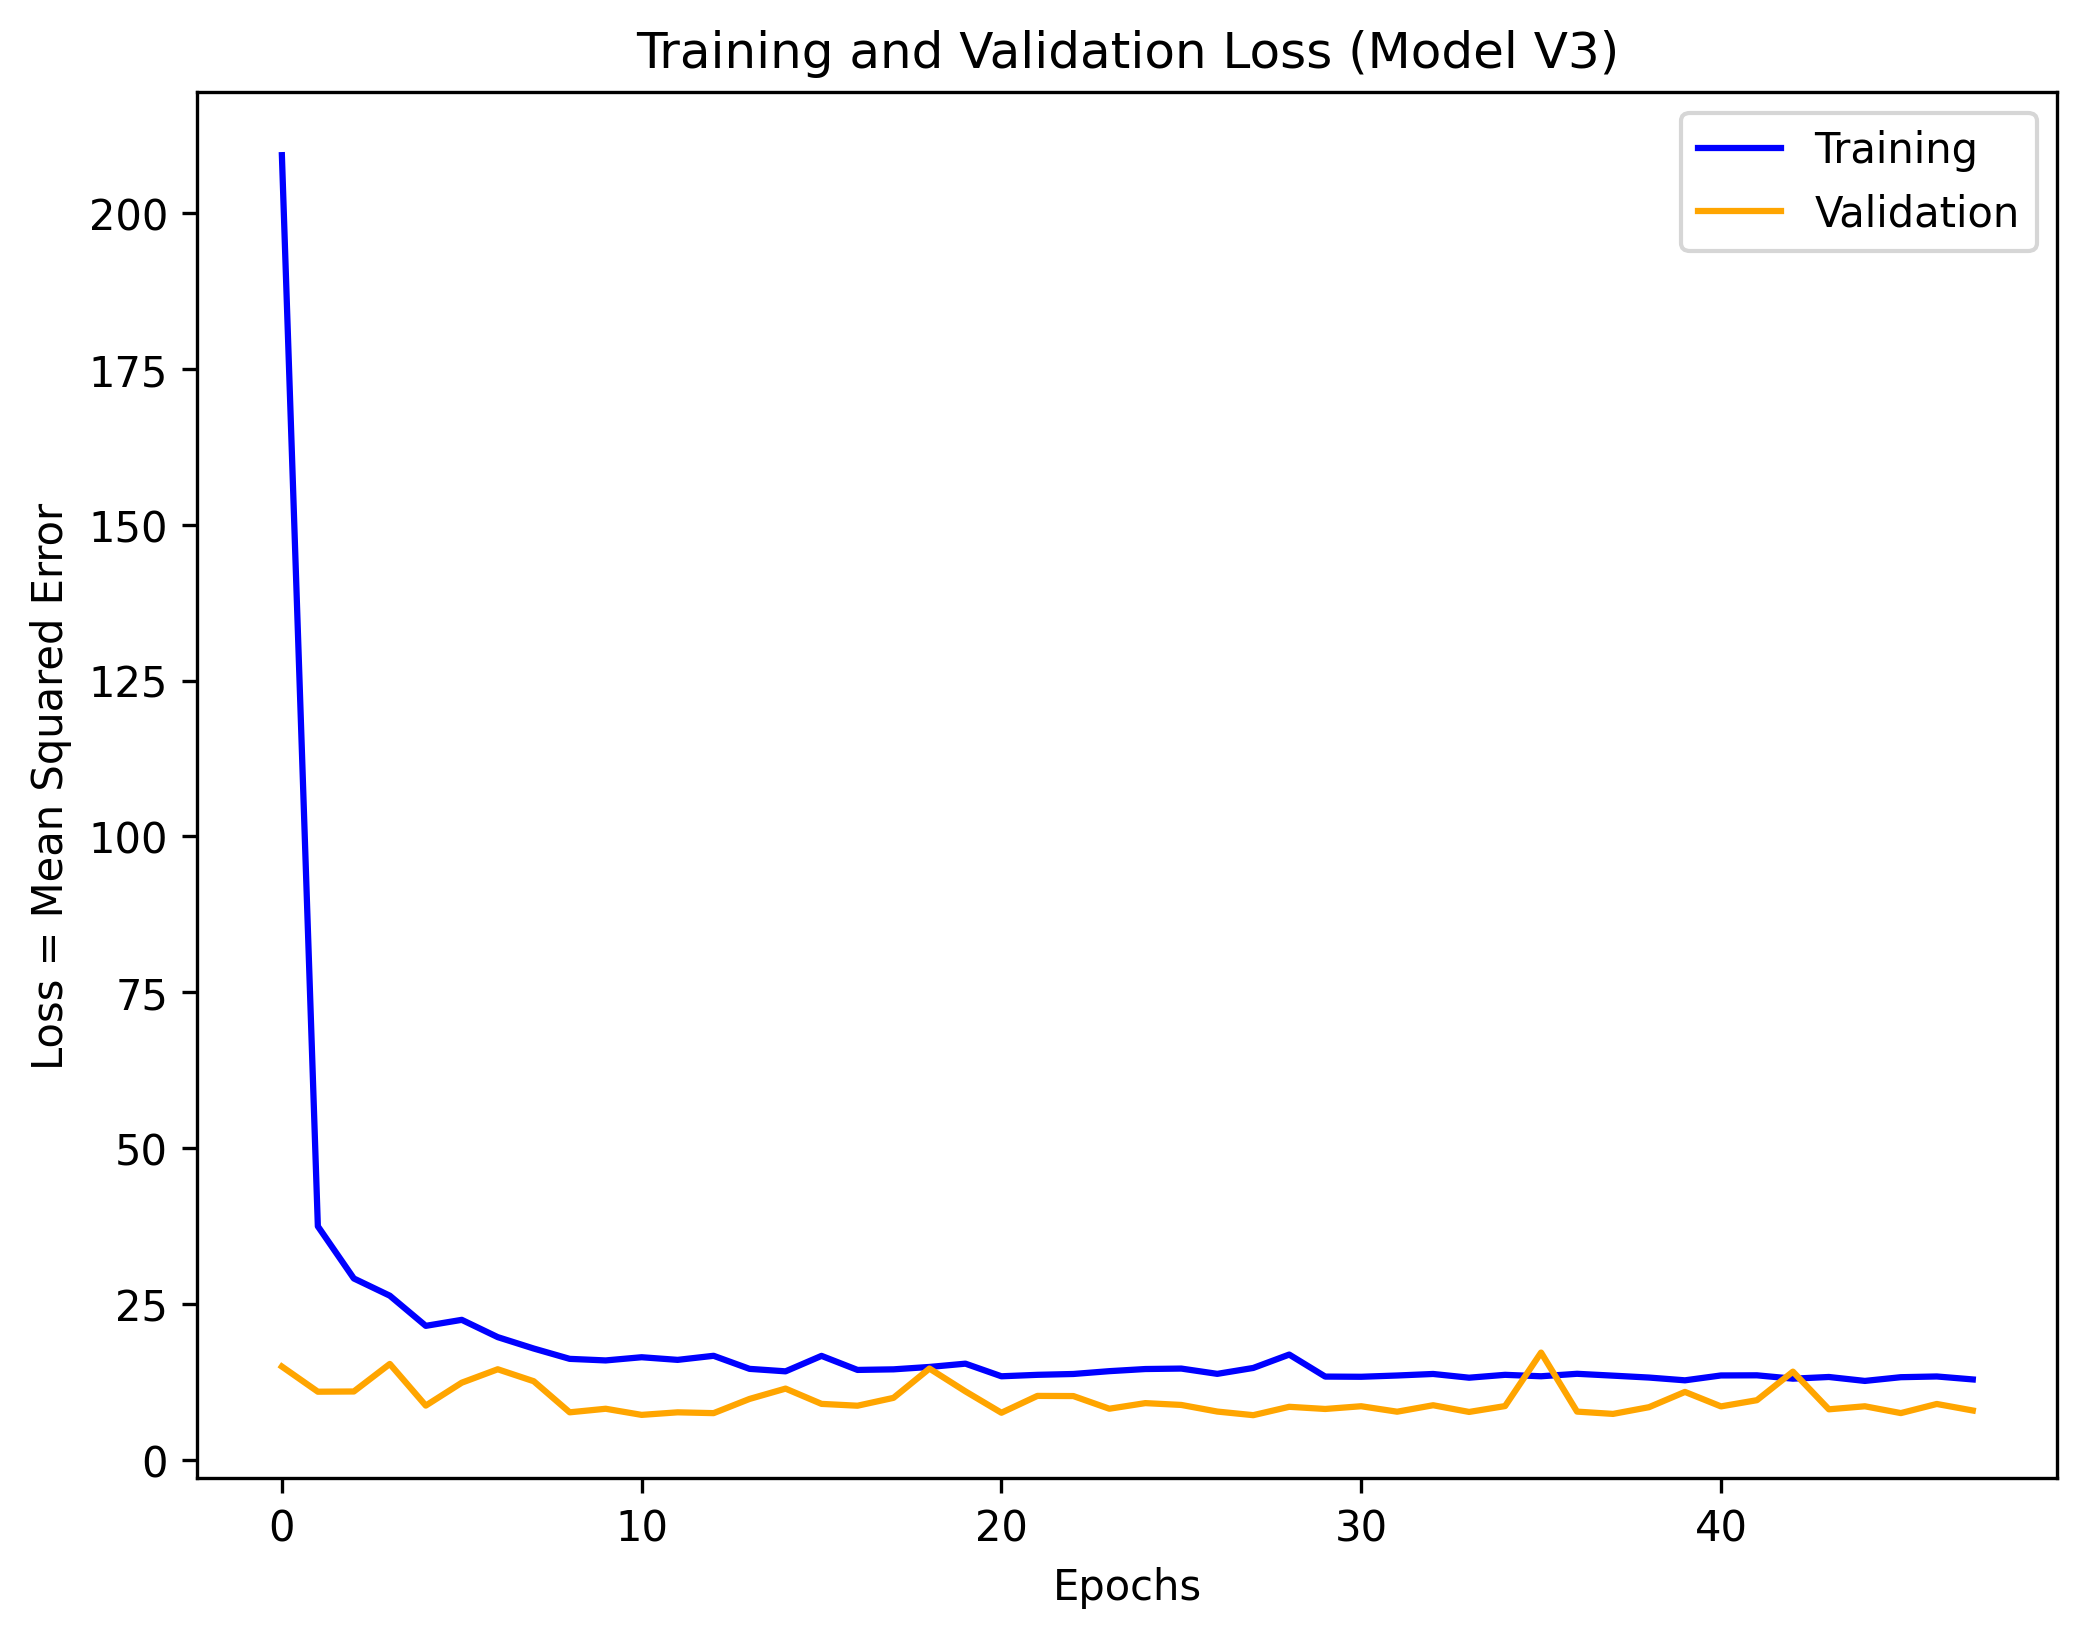

In [48]:
# We start by creating a pandas dataframe containing the history of the fitting.
history_df_v3 = pd.DataFrame(history_v3.history)

# Next, use matplotlib to create a figure.
plt.figure(figsize=(8, 6), dpi=300)

# Plot the history of the training and validation losses.
plt.plot(history_df_v3["loss"], label="Training", color='blue')
plt.plot(history_df_v3["val_loss"], label="Validation", color='orange')

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epochs")
plt.ylabel("Loss = Mean Squared Error")
plt.title("Training and Validation Loss (Model V3)")

# Show the plot.
plt.show()


In [49]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model_v3.evaluate(X_test_processed, y_test, verbose=1)

# Print the evaluation metrics
print(f"Test MAE  : {test_mae:.2f}")
print(f"Test MSE  : {test_mse:.2f}")
print(f"Test RMSE : {np.sqrt(test_mse):.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 74.3525 - mae: 6.9273 - mse: 74.3525
Test MAE  : 6.91
Test MSE  : 74.66
Test RMSE : 8.64


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate predictions on the test set
y_pred = model.predict(X_test_processed)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step
MAE: 1.4148013877868653
MSE: 10.4591193123943
RMSE: 3.234056170259617
R² Score: 0.8843024830043614


### Model 4
b. Adam Optimizer (Learning Rate of 0.0001)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the optimizer with a lower learning rate
adam_v4 = Adam(learning_rate=0.0001)

# Build the model (same architecture as Model V1)
model_v4 = Sequential()
model_v4.add(Input(shape=(X_train_processed.shape[1],)))
model_v4.add(Dense(units=64, activation='relu'))
model_v4.add(Dropout(0.2))
model_v4.add(Dense(units=64, activation='relu'))
model_v4.add(Dense(units=64, activation='relu'))
model_v4.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [52]:
# Compile the model
model_v4.compile(optimizer=adam_v4, loss='mse', metrics=['mae', 'mse'])

# Setup early stopping
early_stop_v4 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history_v4 = model_v4.fit(
    X_train_processed,
    y_train,
    validation_split=0.1,
    epochs=200,
    callbacks=[early_stop_v4],
    verbose=1
)


Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2195.7231 - mae: 45.8948 - mse: 2195.7231 - val_loss: 2129.6641 - val_mae: 45.2192 - val_mse: 2129.6641
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 2023.7809 - mae: 43.9388 - mse: 2023.7809 - val_loss: 1710.6134 - val_mae: 40.3889 - val_mse: 1710.6134
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 1481.2567 - mae: 37.3442 - mse: 1481.2567 - val_loss: 789.7740 - val_mae: 26.7899 - val_mse: 789.7740
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 554.2306 - mae: 21.4656 - mse: 554.2306 - val_loss: 127.5900 - val_mae: 9.2470 - val_mse: 127.5900
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 132.9065 - mae: 9.1329 - mse: 132.9065 - val_loss: 83.7261 - val_mae: 7.4714 - val_mse: 83.7261
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 102.1595 - mae: 7.9564 - mse: 102.1595 - val_loss: 76.3927 - val_mae: 7.1237 - val_mse: 76.3927
Epoch 7/200
113/113 ━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


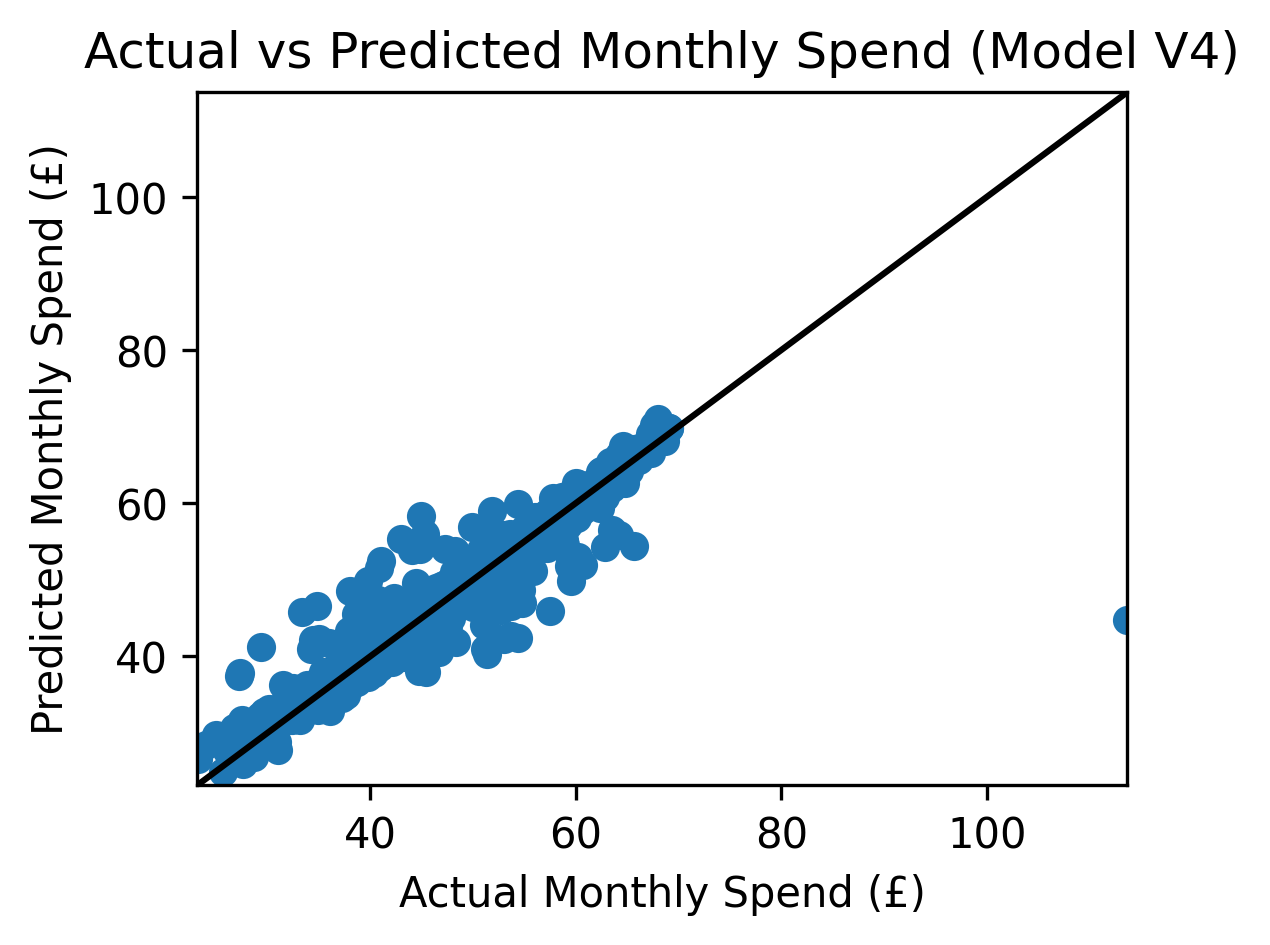

In [53]:
# Predict the model outputs for the test set
y_pred_v4 = model_v4.predict(X_test_processed)

# Scatter plot
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(y_test, y_pred_v4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-')
plt.xlabel("Actual Monthly Spend (£)")
plt.ylabel("Predicted Monthly Spend (£)")
plt.title("Actual vs Predicted Monthly Spend (Model V4)")
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.show()


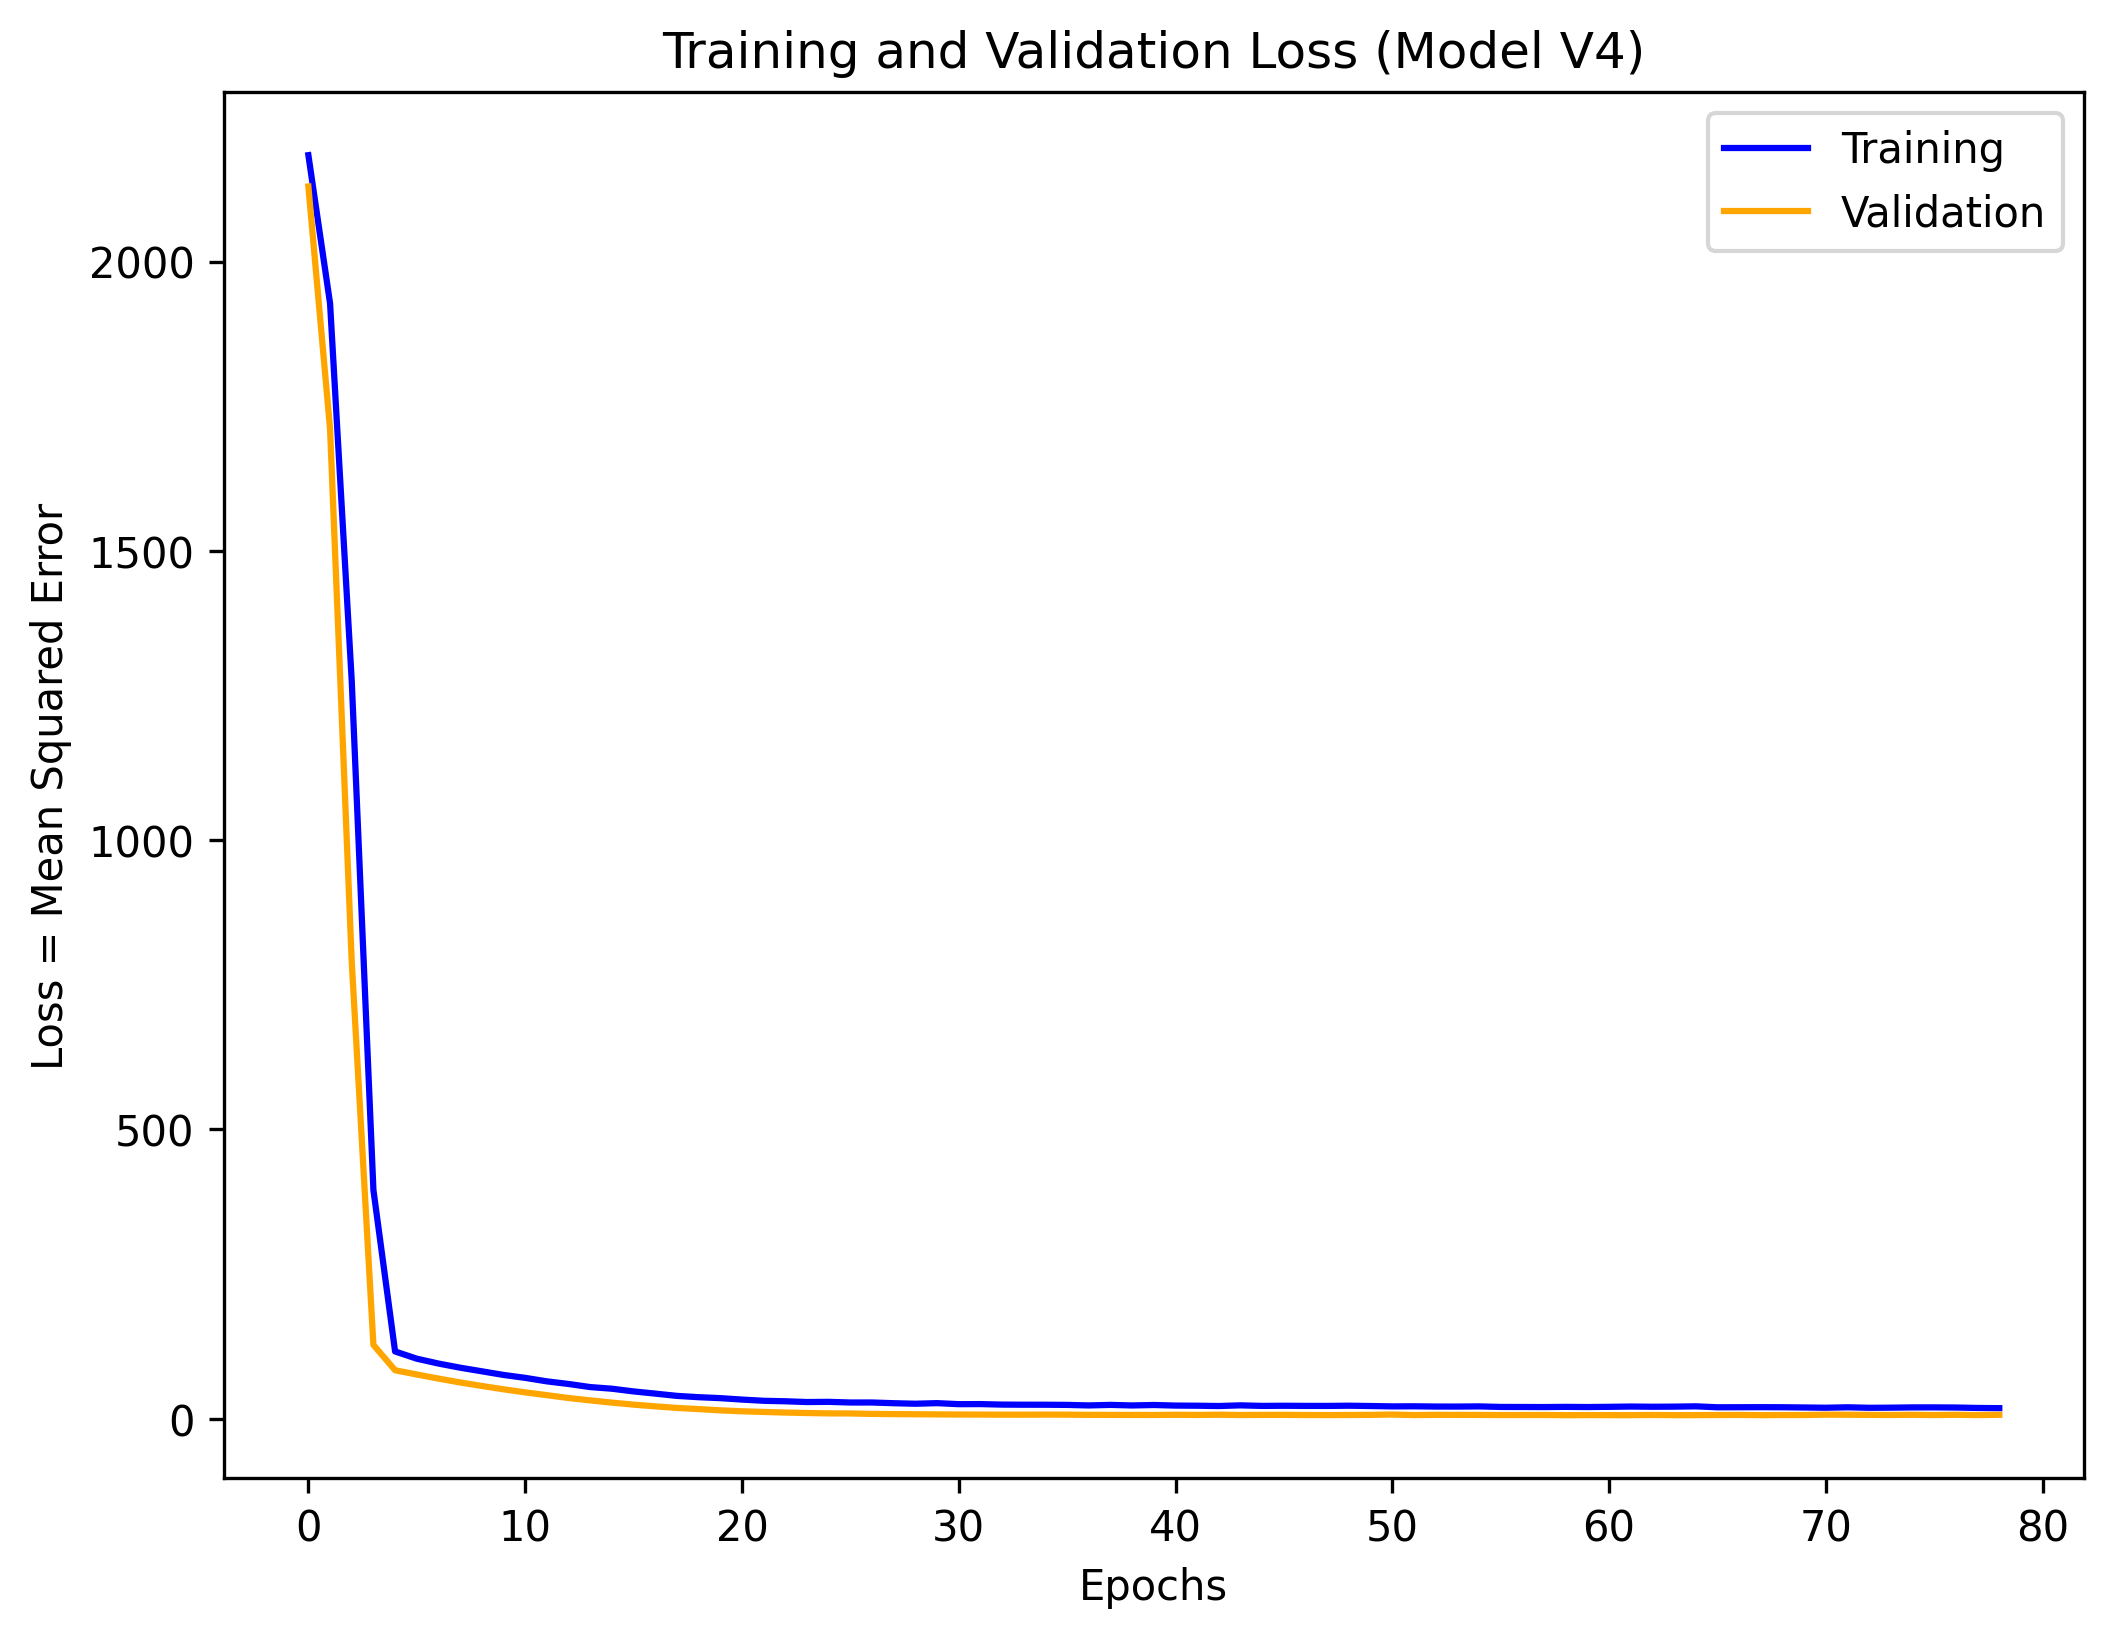

In [54]:
# We start by creating a pandas dataframe containing the history of the fitting.
history_df_v4 = pd.DataFrame(history_v4.history)

# Next, use matplotlib to create a figure.
plt.figure(figsize=(8, 6), dpi=300)

# Plot the history of the training and validation losses.
plt.plot(history_df_v4["loss"], label="Training", color='blue')
plt.plot(history_df_v4["val_loss"], label="Validation", color='orange')

# Add a legend to the plot.
plt.legend()

# Label both axes.
plt.xlabel("Epochs")
plt.ylabel("Loss = Mean Squared Error")
plt.title("Training and Validation Loss (Model V4)")

# Show the plot.
plt.show()


In [55]:
# Evaluate
results_v4 = model_v4.evaluate(X_test_processed, y_test)
print("Test Loss:", results_v4[0])
print("Test MAE:", results_v4[1])
print("Test MSE:", results_v4[2])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 8.1442 - mae: 1.5074 - mse: 8.1442
Test Loss: 11.133440971374512
Test MAE: 1.5960770845413208
Test MSE: 11.133440971374512


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae_v4 = mean_absolute_error(y_test, y_pred_v4)
mse_v4 = mean_squared_error(y_test, y_pred_v4)
rmse_v4 = np.sqrt(mse_v4)
r2_v4 = r2_score(y_test, y_pred_v4)

# Print
print("MAE:", mae_v4)
print("MSE:", mse_v4)
print("RMSE:", rmse_v4)
print("R² Score:", r2_v4)


MAE: 1.5960769580841065
MSE: 11.133439270635556
RMSE: 3.3366808763553575
R² Score: 0.8768432369150024


### Model 5
Using an adam optimizer (learning rate of 0.01) and a dropout rate of 15%)

In [65]:
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the neural network model architecture
model_v5 = keras.Sequential([
    keras.layers.Input(shape=(12,)),
    Dense(64, activation='relu'),  # Input layer with 64 units and ReLU activation
    Dropout(0.15),  # Dropout layer with 15% rate to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer with 64 units and ReLU activation
    Dense(1)  # Output layer for regression (predicting a single continuous value)
])

# Configure the optimizer with a learning rate of 0.01
optimizer = Adam(learning_rate=0.01)
# Printing the model summary to see the structure of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [66]:
# Compile the model with Mean Squared Error loss and evaluation metrics
model_v5.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

# Apply early stopping to prevent overfitting and reduce training time
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [67]:
# Train the model on the training data, validating on the validation set
history_v5 = model_v5.fit(
    X_train_processed,
    y_train,
    validation_split=0.1,
    epochs=200,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 670.9308 - mae: 19.2560 - mse: 670.9308 - val_loss: 9.6921 - val_mae: 2.1844 - val_mse: 9.6921
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 23.9705 - mae: 3.3935 - mse: 23.9705 - val_loss: 6.6203 - val_mae: 1.5492 - val_mse: 6.6203
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 18.7819 - mae: 3.0536 - mse: 18.7819 - val_loss: 7.0496 - val_mae: 1.6941 - val_mse: 7.0496
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 22.3220 - mae: 2.9457 - mse: 22.3220 - val_loss: 6.0832 - val_mae: 1.4024 - val_mse: 6.0832
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 16.9666 - mae: 2.8874 - mse: 16.9666 - val_loss: 5.8781 - val_mae: 1.3819 - val_mse: 5.8781
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 15.9737 - mae: 2.8165 - mse: 15.9737 - val_loss: 13.4505 - val_mae: 3.0000 - val_mse: 13.4505
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 21.9

In [69]:
# Make predictions on test data
y_pred_v5 = model_v5.predict(X_test_processed)

# Calculate evaluation metrics
mae_v5 = mean_absolute_error(y_test, y_pred_v5)
mse_v5 = mean_squared_error(y_test, y_pred_v5)
rmse_v5 = np.sqrt(mse_v5)
r2_v5 = r2_score(y_test, y_pred_v5)

# Print performance metrics
print(f"Test MAE:  {mae_v5:.2f}")
print(f"Test MSE:  {mse_v5:.2f}")
print(f"Test RMSE: {rmse_v5:.2f}")
print(f"R² Score:  {r2_v5:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
Test MAE:  1.45
Test MSE:  10.60
Test RMSE: 3.26
R² Score:  0.8828


In [70]:
# Evaluate
results_v5 = model_v5.evaluate(X_test_processed, y_test)
print("Test Loss:", results_v4[0])
print("Test MAE:", results_v4[1])
print("Test MSE:", results_v4[2])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 7.6897 - mae: 1.3729 - mse: 7.6897
Test Loss: 11.133440971374512
Test MAE: 1.5960770845413208
Test MSE: 11.133440971374512


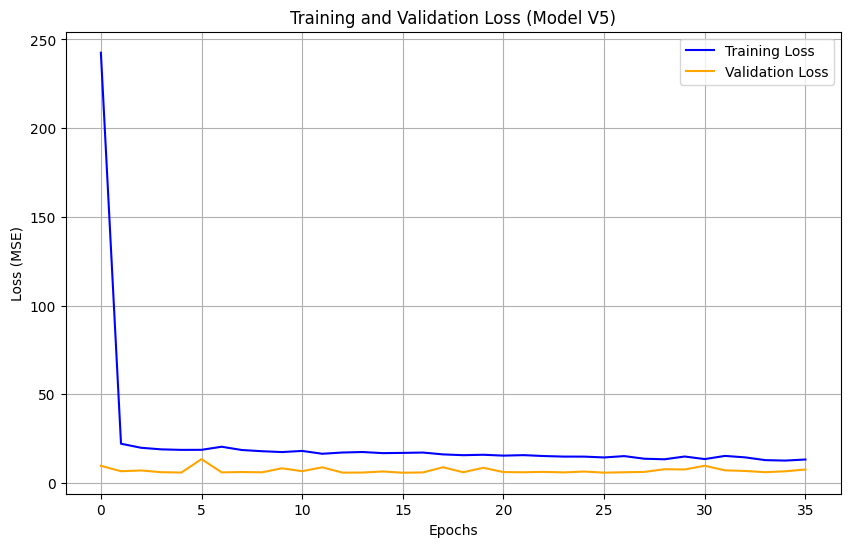

In [71]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10,6))
plt.plot(history_v5.history['loss'], label='Training Loss', color='blue')
plt.plot(history_v5.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss (Model V5)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

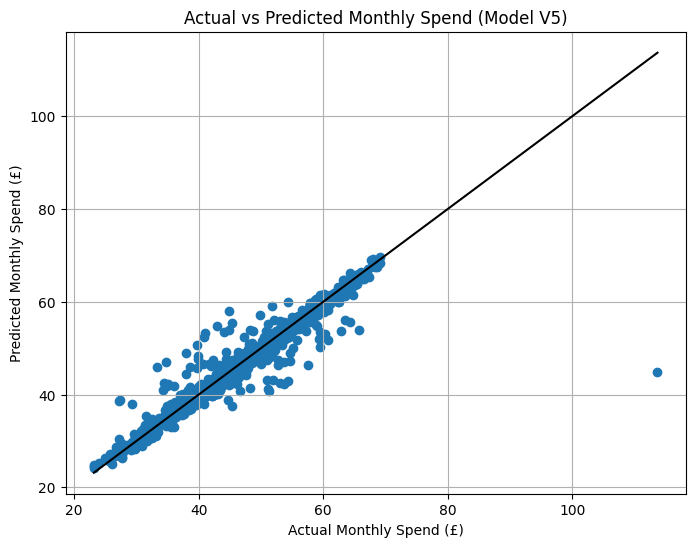

In [72]:
# Plot actual vs predicted monthly spend
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_v5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Monthly Spend (£)')
plt.ylabel('Predicted Monthly Spend (£)')
plt.title('Actual vs Predicted Monthly Spend (Model V5)')
plt.grid(True)
plt.show()

### Model 6
Using the default adam optimizer and a 10% dropout rate

In [84]:
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the model with Input layer
model_v6 = keras.Sequential([
    keras.layers.Input(shape=(12,)),  # Adjust shape to match X_train_processed
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [85]:
# Compile the model with default Adam optimizer
model_v6.compile(optimizer=Adam(), loss='mse', metrics=['mae', 'mse'])

# Configure early stopping to prevent overfitting
early_stop_v6 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [88]:
history_v6 = model_v6.fit(
    X_train_processed,
    y_train,
    validation_split=0.1,
    epochs=200,
    callbacks=[early_stop_v6],
    verbose=1
)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1845.9097 - mae: 40.9246 - mse: 1845.9097 - val_loss: 95.7308 - val_mae: 7.8785 - val_mse: 95.7308
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 95.5315 - mae: 7.6838 - mse: 95.5315 - val_loss: 50.5385 - val_mae: 5.7081 - val_mse: 50.5385
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 56.3309 - mae: 5.8598 - mse: 56.3309 - val_loss: 24.5451 - val_mae: 3.9168 - val_mse: 24.5451
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 30.8513 - mae: 4.1962 - mse: 30.8513 - val_loss: 10.8922 - val_mae: 2.3884 - val_mse: 10.8922
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 19.5559 - mae: 3.0203 - mse: 19.5559 - val_loss: 7.7796 - val_mae: 1.8556 - val_mse: 7.7796
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 24.0234 - mae: 2.8542 - mse: 24.0234 - val_loss: 7.0588 - val_mae: 1.6452 - val_mse: 7.0588
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - lo

In [91]:
# Make predictions on test data
y_pred_v6 = model_v6.predict(X_test_processed)

# Calculate evaluation metrics
mae_v6 = mean_absolute_error(y_test, y_pred_v6)
mse_v6 = mean_squared_error(y_test, y_pred_v6)
rmse_v6 = np.sqrt(mse_v6)
r2_v6 = r2_score(y_test, y_pred_v6)

# Print performance metrics
print(f"Test MAE:  {mae_v6:.2f}")
print(f"Test MSE:  {mse_v6:.2f}")
print(f"Test RMSE: {rmse_v6:.2f}")
print(f"R² Score:  {r2_v6:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test MAE:  1.43
Test MSE:  10.53
Test RMSE: 3.24
R² Score:  0.8835


In [92]:
# Evaluate
results_v6 = model_v6.evaluate(X_test_processed, y_test)
print("Test Loss:", results_v4[0])
print("Test MAE:", results_v4[1])
print("Test MSE:", results_v4[2])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 7.6760 - mae: 1.3312 - mse: 7.6760
Test Loss: 11.133440971374512
Test MAE: 1.5960770845413208
Test MSE: 11.133440971374512


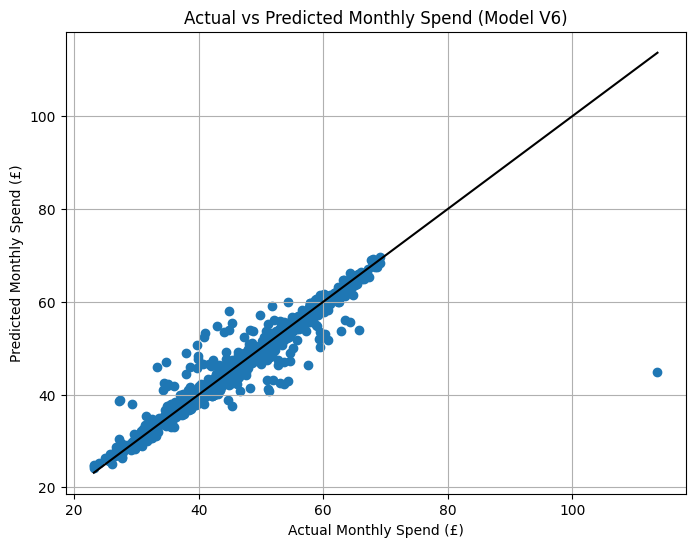

In [97]:
# Plot actual vs predicted monthly spend
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_v5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Monthly Spend (£)')
plt.ylabel('Predicted Monthly Spend (£)')
plt.title('Actual vs Predicted Monthly Spend (Model V6)')
plt.grid(True)
plt.show()

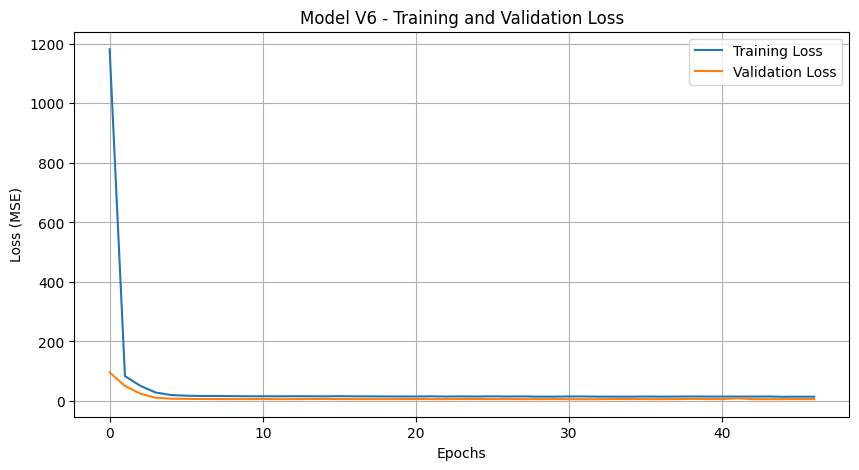

In [94]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_v6.history['loss'], label='Training Loss')
plt.plot(history_v6.history['val_loss'], label='Validation Loss')
plt.title('Model V6 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## 1.F

Train, evaluate and compare classification models to predict whether a customer will churn
(1) or not churn (0) based on available features. Which model performs best, and why? Use
appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC-ROC) to
justify your findings

#### Support Vector Machine (SVM) Classification Model

In [98]:
def build_and_evaluate_svm(data, numeric_cols, categorical_cols, label_col='Churned',
                           test_ratio=0.2, random_state=42):
    """
    Trains and evaluates an SVM classifier for predicting customer churn.
    This function handles preprocessing, balancing with SMOTE, training,
    evaluation, and visualization of results.

    Parameters:
        data (pd.DataFrame): The dataset containing features and target.
        numeric_cols (list): List of numeric feature column names.
        categorical_cols (list): List of categorical feature column names.
        label_col (str): Name of the target column.
        test_ratio (float): Proportion of data to use for testing.
        random_state (int): Seed for reproducibility.
    """

    # --- Feature and Target Separation ---
    features = data[numeric_cols + categorical_cols]
    target = data[label_col]

    # --- Preprocessing: Scaling and Encoding ---
    transformer = ColumnTransformer([
        ('scale', StandardScaler(), numeric_cols),
        ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

    # Fit and transform the input features
    features_prepared = transformer.fit_transform(features)

    # --- Visualize Class Imbalance ---
    print("Class distribution before SMOTE:")
    target.value_counts().plot(kind='bar', title='Original Class Distribution', xlabel='Churn', ylabel='Count')
    plt.tight_layout()
    plt.show()

    # --- Handle Imbalance with SMOTE ---
    smote = SMOTE(random_state=random_state, k_neighbors=2)
    features_balanced, target_balanced = smote.fit_resample(features_prepared, target)

    # --- Post-SMOTE Visualization ---
    pd.Series(target_balanced).value_counts().plot(kind='bar', color='orange',
        title='Balanced Class Distribution After SMOTE', xlabel='Churn', ylabel='Count')
    plt.tight_layout()
    plt.show()

    # --- Train-Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(
        features_balanced, target_balanced, test_size=test_ratio, random_state=random_state
    )

    # --- Model Definition ---
    svm_clf = SVC(kernel='rbf', probability=True, random_state=random_state)

    # --- Model Training ---
    svm_clf.fit(X_train, y_train)

    # --- Prediction and Probability Estimates ---
    y_pred = svm_clf.predict(X_test)
    y_prob = svm_clf.predict_proba(X_test)[:, 1]

    # --- Evaluation Metrics ---
    print("\n--- SVM Classification Performance ---")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC  : {roc_auc_score(y_test, y_prob):.4f}")

    # --- Detailed Classification Report ---
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # --- Confusion Matrix Heatmap ---
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title('Confusion Matrix - SVM')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM')
    plt.legend()
    plt.tight_layout()
    plt.show()

Class distribution before SMOTE:


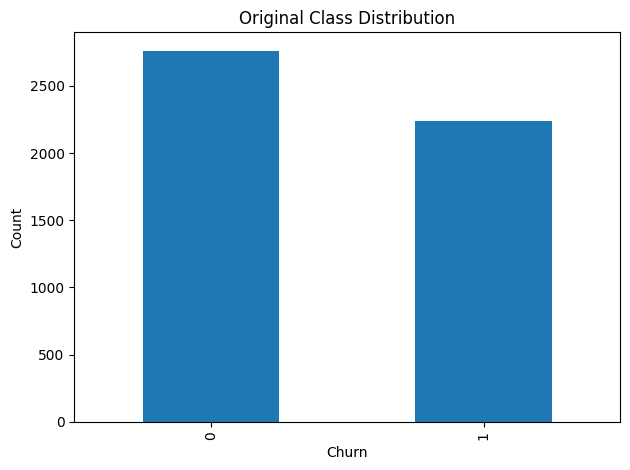

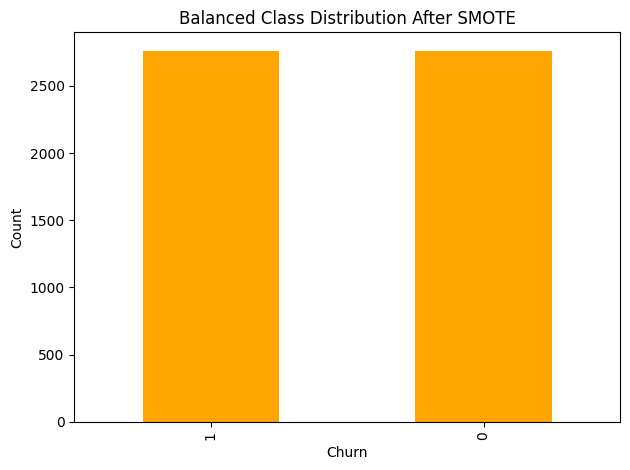


--- SVM Classification Performance ---
Accuracy : 0.9429
Precision: 0.9326
Recall   : 0.9546
F1-Score : 0.9435
AUC-ROC  : 0.9802

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       553
           1       0.93      0.95      0.94       551

    accuracy                           0.94      1104
   macro avg       0.94      0.94      0.94      1104
weighted avg       0.94      0.94      0.94      1104



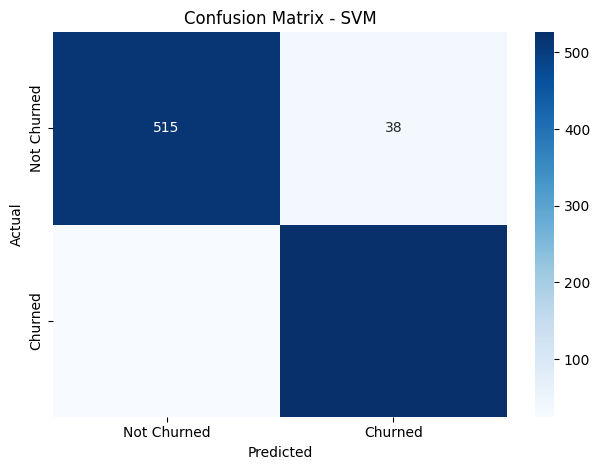

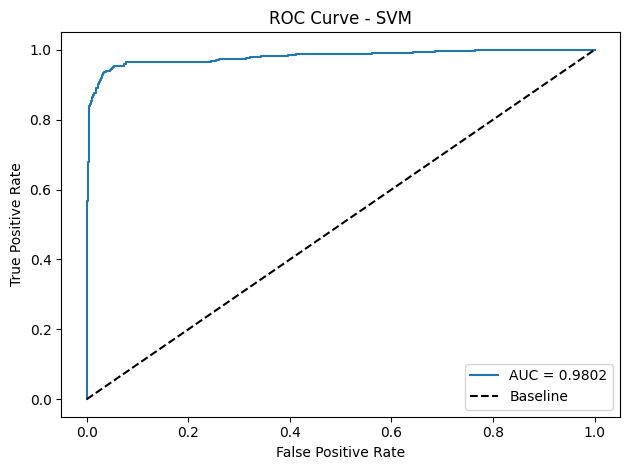

In [100]:
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

categorical_features = ["Gender", "Region", "Payment_Method"]

build_and_evaluate_svm(streaming_data_copy, numerical_features, categorical_features, label_col="Churned")


#### KNN Classification Model

In [110]:
def knn_churn_classifier(data, numerical_cols, categorical_cols, target_col="Churned", k_neighbors=5, test_size=0.2, random_state=42):
    """
    Train and evaluate a KNN model to predict customer churn.
    Applies preprocessing, balances classes using SMOTE, and evaluates using classification metrics.

    Parameters:
    - data (pd.DataFrame): The dataset
    - numerical_cols (list): List of numerical column names
    - categorical_cols (list): List of categorical column names
    - target_col (str): Target column name (default: 'Churned')
    - k_neighbors (int): Number of neighbors for KNN
    - test_size (float): Proportion of data to use for testing
    - random_state (int): Seed for reproducibility
    """

    # ----------------------------
    # Separate features and target
    # ----------------------------
    X = data[numerical_cols + categorical_cols]
    y = data[target_col]

    # ----------------------------
    # Show original class distribution
    # ----------------------------
    class_counts_before = y.value_counts()
    print("Class Distribution Before SMOTE:")
    print(class_counts_before)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette="Set2")
    plt.title("Class Distribution Before SMOTE")
    plt.xlabel("Churned")
    plt.ylabel("Count")
    plt.show()

    # ----------------------------
    # Preprocess data
    # ----------------------------
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
        ]
    )
    X_processed = preprocessor.fit_transform(X)

    # ----------------------------
    # Apply SMOTE to balance the data
    # ----------------------------
    smote = SMOTE(random_state=random_state)
    X_balanced, y_balanced = smote.fit_resample(X_processed, y)

    # ----------------------------
    # Show new class distribution
    # ----------------------------
    class_counts_after = pd.Series(y_balanced).value_counts()
    print("Class Distribution After SMOTE:")
    print(class_counts_after)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette="Set2")
    plt.title("Class Distribution After SMOTE")
    plt.xlabel("Churned")
    plt.ylabel("Count")
    plt.show()

    # ----------------------------
    # Split into training and test sets
    # ----------------------------
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=test_size, random_state=random_state)

    # ----------------------------
    # Build and train the KNN classifier
    # ----------------------------
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_train, y_train)

    # ----------------------------
    # Make predictions
    # ----------------------------
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]

    # ----------------------------
    # Evaluate the model
    # ----------------------------
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print("\nKNN Classifier Evaluation:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"AUC-ROC   : {auc:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # ----------------------------
    # Confusion Matrix
    # ----------------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title("Confusion Matrix (KNN)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ----------------------------
    # ROC Curve
    # ----------------------------
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], "k--")  # Fixed line
    plt.title("ROC Curve (KNN)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()



Class Distribution Before SMOTE:
Churned
0    2760
1    2240
Name: count, dtype: int64


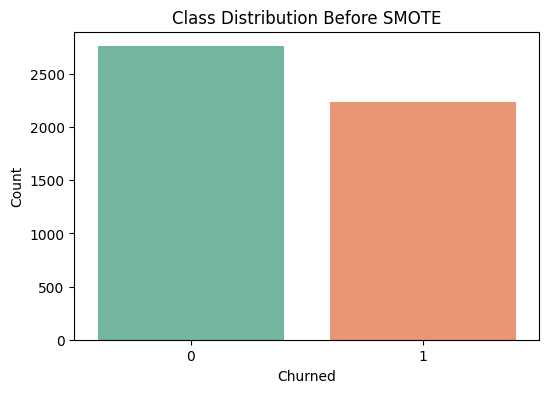

Class Distribution After SMOTE:
Churned
1    2760
0    2760
Name: count, dtype: int64


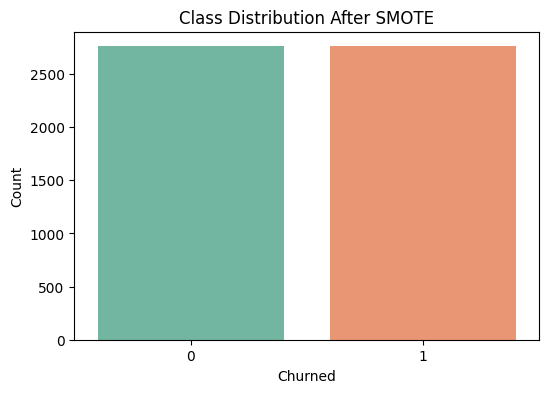


KNN Classifier Evaluation:
Accuracy  : 0.8723
Precision : 0.8674
Recall    : 0.8784
F1-Score  : 0.8729
AUC-ROC   : 0.9329

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       553
           1       0.87      0.88      0.87       551

    accuracy                           0.87      1104
   macro avg       0.87      0.87      0.87      1104
weighted avg       0.87      0.87      0.87      1104



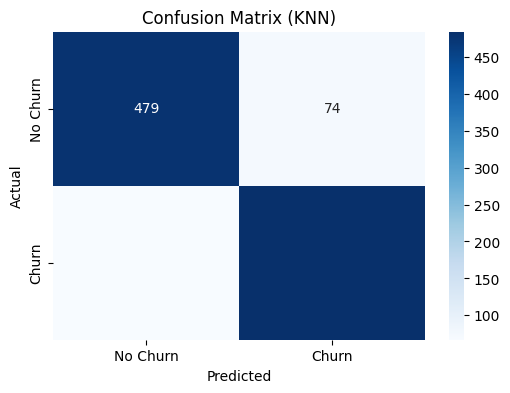

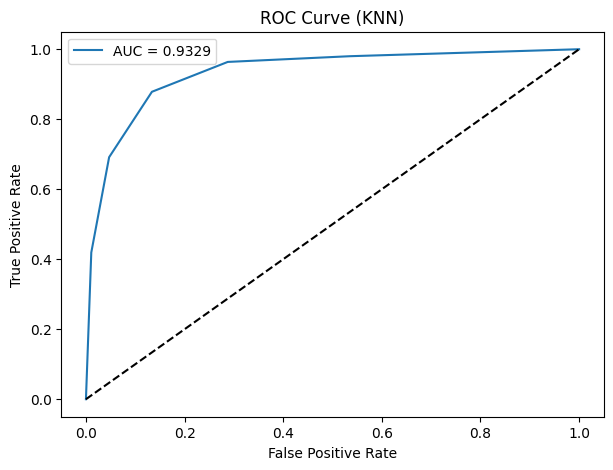

In [111]:
num_cols = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
cat_cols = ["Gender", "Region", "Payment_Method"]

knn_churn_classifier(streaming_data_copy, num_cols, cat_cols)


#### Random Forest Classification Model

In [114]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_churn_classifier(data, numerical_cols, categorical_cols, target_col="Churned", test_size=0.2, random_state=42):
    """
    Train and evaluate a Random Forest model to predict customer churn.
    Applies preprocessing, uses SMOTE to balance classes, and evaluates performance.

    Parameters:
    - data (pd.DataFrame): The dataset.
    - numerical_cols (list): List of numerical feature names.
    - categorical_cols (list): List of categorical feature names.
    - target_col (str): The name of the target column (default = "Churned").
    - test_size (float): Fraction of data to use for testing (default = 0.2).
    - random_state (int): Random seed for reproducibility (default = 42).
    """

    # ----------------------------
    # Separate features and target
    # ----------------------------
    X = data[numerical_cols + categorical_cols]
    y = data[target_col]

    # ----------------------------
    # Show original class distribution
    # ----------------------------
    class_counts_before = y.value_counts()
    print("Class Distribution Before SMOTE:")
    print(class_counts_before)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts_before.index, y=class_counts_before.values, palette="Set3")
    plt.title("Class Distribution Before SMOTE")
    plt.xlabel("Churned")
    plt.ylabel("Count")
    plt.show()

    # ----------------------------
    # Preprocess data
    # ----------------------------
    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ])
    X_processed = preprocessor.fit_transform(X)

    # ----------------------------
    # Apply SMOTE to balance classes
    # ----------------------------
    smote = SMOTE(random_state=random_state)
    X_balanced, y_balanced = smote.fit_resample(X_processed, y)

    # ----------------------------
    # Show new class distribution
    # ----------------------------
    class_counts_after = pd.Series(y_balanced).value_counts()
    print("Class Distribution After SMOTE:")
    print(class_counts_after)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts_after.index, y=class_counts_after.values, palette="Set3")
    plt.title("Class Distribution After SMOTE")
    plt.xlabel("Churned")
    plt.ylabel("Count")
    plt.show()

    # ----------------------------
    # Train/test split
    # ----------------------------
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=test_size, random_state=random_state)

    # ----------------------------
    # Train the Random Forest model
    # ----------------------------
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)

    # ----------------------------
    # Make predictions
    # ----------------------------
    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]

    # ----------------------------
    # Evaluate performance
    # ----------------------------
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print("\nRandom Forest Classifier Evaluation:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"AUC-ROC   : {auc:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # ----------------------------
    # Confusion Matrix
    # ----------------------------
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title("Confusion Matrix (Random Forest)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ----------------------------
    # ROC Curve
    # ----------------------------
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("ROC Curve (Random Forest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Plot Feature Importance
    feature_importances = rf.feature_importances_
    cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    feature_names = numerical_cols + list(cat_feature_names)

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(6, 4))
    sns.barplot(data=importance_df, x="Importance", y="Feature")
    plt.title("Feature Importance (Random Forest)")
    plt.tight_layout()
    plt.show()


Class Distribution Before SMOTE:
Churned
0    2760
1    2240
Name: count, dtype: int64


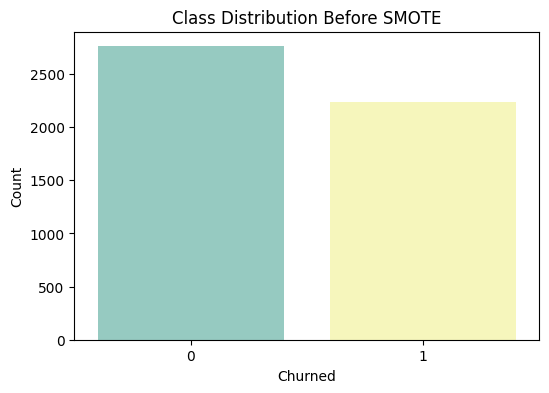

Class Distribution After SMOTE:
Churned
1    2760
0    2760
Name: count, dtype: int64


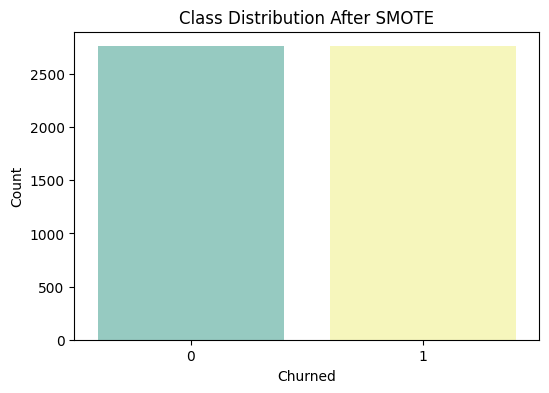


Random Forest Classifier Evaluation:
Accuracy  : 0.9819
Precision : 1.0000
Recall    : 0.9637
F1-Score  : 0.9815
AUC-ROC   : 0.9940

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       553
           1       1.00      0.96      0.98       551

    accuracy                           0.98      1104
   macro avg       0.98      0.98      0.98      1104
weighted avg       0.98      0.98      0.98      1104



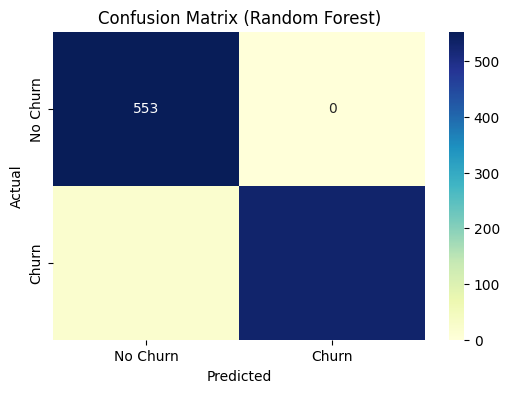

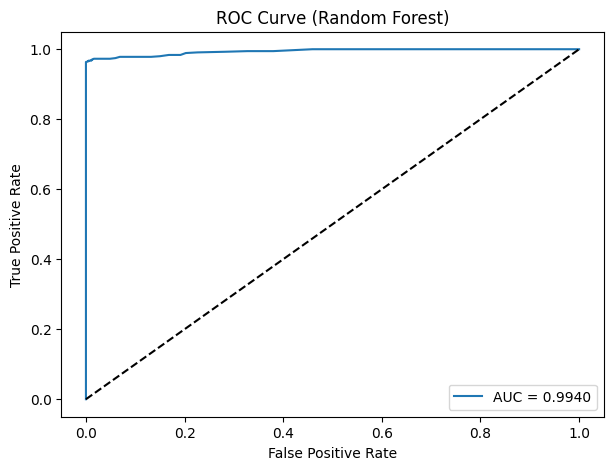

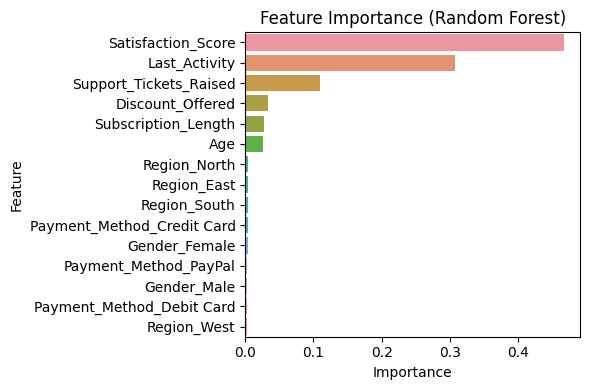

In [115]:
num_cols = ["Age", "Subscription_Length", "Support_Tickets_Raised", "Satisfaction_Score", "Discount_Offered", "Last_Activity"]
cat_cols = ["Gender", "Region", "Payment_Method"]

random_forest_churn_classifier(streaming_data_copy, num_cols, cat_cols)


#### Classification with SMOTE

In [116]:
def compare_classification_models(data, num_cols, cat_cols, target="Churned", test_size=0.2, random_state=42):
    """
    Train and compare KNN, Random Forest, and SVM classifiers for customer churn prediction.
    Uses SMOTE to balance the data, evaluates performance with key metrics, and plots results.

    Parameters:
    - data (pd.DataFrame): The dataset.
    - num_cols (list): List of numerical column names.
    - cat_cols (list): List of categorical column names.
    - target (str): Target column name for churn (default: "Churned").
    - test_size (float): Proportion for test data.
    - random_state (int): Seed for reproducibility.
    """

    # -----------------------
    # Extract features and labels
    # -----------------------
    X = data[num_cols + cat_cols]
    y = data[target]

    # -----------------------
    # Preprocessing pipeline
    # -----------------------
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

    # Fit and transform data
    X_prepared = preprocessor.fit_transform(X)

    # -----------------------
    # Visualize imbalance before SMOTE
    # -----------------------
    print("Class Distribution Before SMOTE:")
    print(y.value_counts())
    plt.figure(figsize=(5, 3))
    sns.barplot(x=y.value_counts().index, y=y.value_counts().values)
    plt.title("Before SMOTE")
    plt.xlabel("Churned")
    plt.ylabel("Count")
    plt.show()

    # -----------------------
    # Apply SMOTE to balance the dataset
    # -----------------------
    smote = SMOTE(random_state=random_state, k_neighbors=2)
    X_res, y_res = smote.fit_resample(X_prepared, y)

    # -----------------------
    # Visualize balance after SMOTE
    # -----------------------
    print("Class Distribution After SMOTE:")
    print(pd.Series(y_res).value_counts())
    plt.figure(figsize=(5, 3))
    sns.barplot(x=pd.Series(y_res).value_counts().index, y=pd.Series(y_res).value_counts().values)
    plt.title("After SMOTE")
    plt.xlabel("Churned")
    plt.ylabel("Count")
    plt.show()

    # -----------------------
    # Train-test split
    # -----------------------
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=test_size, random_state=random_state)

    # -----------------------
    # Define models
    # -----------------------
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
        "SVM": SVC(probability=True, random_state=random_state)
    }

    results = {}

    # -----------------------
    # Train and evaluate each model
    # -----------------------
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]  # Needed for AUC

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "AUC-ROC": auc
        }

        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred))

    # -----------------------
    # Display comparison results
    # -----------------------
    results_df = pd.DataFrame(results).T
    print("\nModel Performance Comparison:")
    display(results_df.round(4))

    # -----------------------
    # Plot comparison
    # -----------------------
    results_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Model Comparison on Churn Prediction")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


Class Distribution Before SMOTE:
Churned
0    2760
1    2240
Name: count, dtype: int64


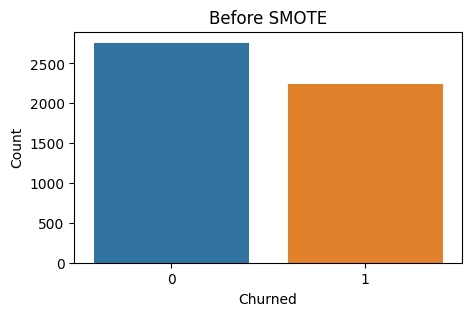

Class Distribution After SMOTE:
Churned
1    2760
0    2760
Name: count, dtype: int64


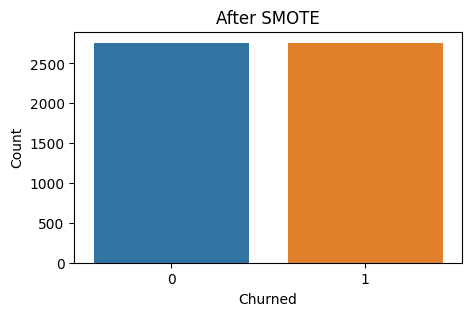


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       553
           1       0.86      0.87      0.87       551

    accuracy                           0.87      1104
   macro avg       0.87      0.87      0.87      1104
weighted avg       0.87      0.87      0.87      1104


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       553
           1       1.00      0.97      0.98       551

    accuracy                           0.98      1104
   macro avg       0.99      0.98      0.98      1104
weighted avg       0.99      0.98      0.98      1104


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       553
           1       0.93      0.95      0.94       551

    accuracy                           0.94      1104
   macro avg       0.94      0.94 

Accuracy  Precision  Recall  F1-Score  AUC-ROC
KNN              0.8659     0.8631  0.8693    0.8662   0.9334
Random Forest    0.9846     1.0000  0.9691    0.9843   0.9937
SVM              0.9429     0.9326  0.9546    0.9435   0.9802

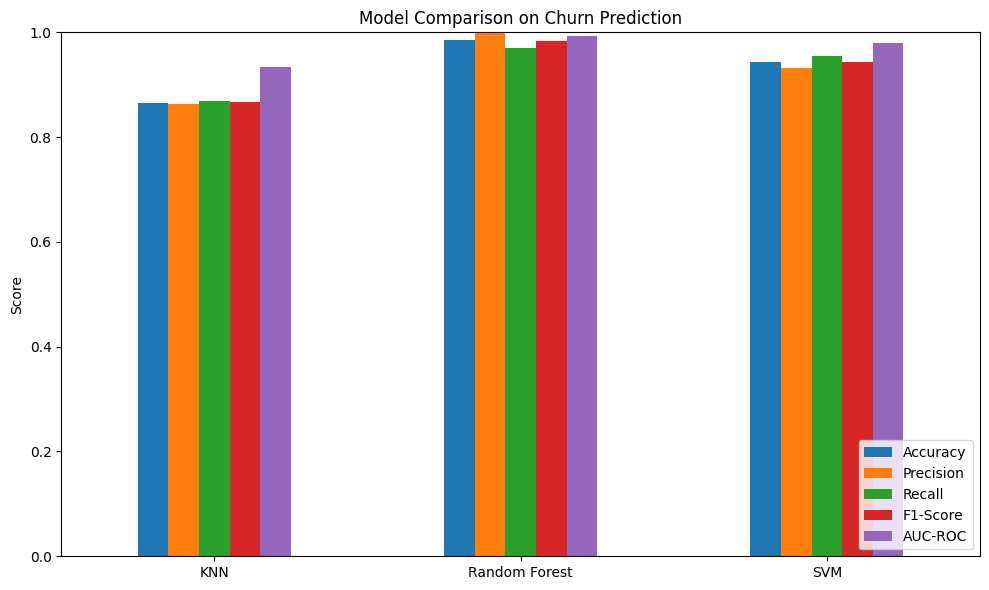

In [117]:
numerical_features = ["Age", "Subscription_Length", "Support_Tickets_Raised", 
                      "Satisfaction_Score", "Discount_Offered", "Last_Activity"]

categorical_features = ["Gender", "Region", "Payment_Method"]

compare_classification_models(streaming_data_copy, numerical_features, categorical_features, target="Churned")


## 1.G
Apply the k-Means clustering algorithm to identify different clusters in the streaming 
service dataset. What is the optimal number of clusters (k) and why? Which features produce 
the most meaningful clusters? Support your answer with visualizations and evaluation metrics.

In [124]:
def kmeans_clustering_loop(df, target_col, numerical_features, max_k=10):
    """
    Perform k-Means clustering on pairs of numerical features with a target column.
    
    Parameters:
        df (pd.DataFrame): Dataset.
        target_col (str): The feature to compare against in clustering (e.g., 'Monthly_Spend').
        numerical_features (list): List of numerical feature names.
        max_k (int): Max number of clusters to test for elbow method.

    Returns:
        dict: Dictionary containing metrics for each feature.
    """
    results = {}

    for feature in numerical_features:
        print(f"\nAnalyzing {feature} against {target_col}...")

        # Subset data
        subset = df[[target_col, feature]].dropna()

        # Scale data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(subset)

        # Elbow method
        inertia = []
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X_scaled)
            inertia.append(kmeans.inertia_)

        # Plot elbow curve
        plt.figure(figsize=(6, 4))
        plt.plot(range(1, max_k + 1), inertia, 'bo-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Inertia')
        plt.title(f'Elbow Method for {feature}')
        plt.grid(True)
        plt.show()

        # Ask user to choose k
        optimal_k = int(input(f"Enter the optimal number of clusters (k) for {feature}: "))

        # Fit final k-means
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)

        # Evaluation metrics
        dbi = davies_bouldin_score(X_scaled, labels)
        silhouette = silhouette_score(X_scaled, labels)

        print(f"Davies-Bouldin Index for {feature}: {dbi:.4f}")
        print(f"Silhouette Coefficient for {feature}: {silhouette:.4f}")

        # Plot clusters
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=subset[feature], y=subset[target_col], hue=labels, palette='Set2')
        plt.title(f'Clusters for {feature} vs {target_col}')
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.legend(title='Cluster')
        plt.show()

        # Save results
        results[feature] = {
            'Optimal_k': optimal_k,
            'Davies_Bouldin_Index': dbi,
            'Silhouette_Coefficient': silhouette
        }

    return results



Analyzing Age against Monthly_Spend...


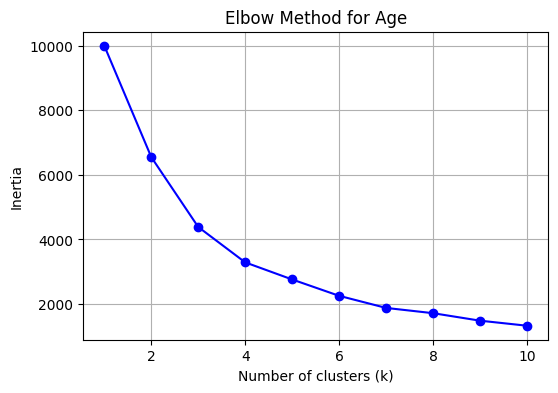

Enter the optimal number of clusters (k) for Age:  4


Davies-Bouldin Index for Age: 0.9082
Silhouette Coefficient for Age: 0.3323


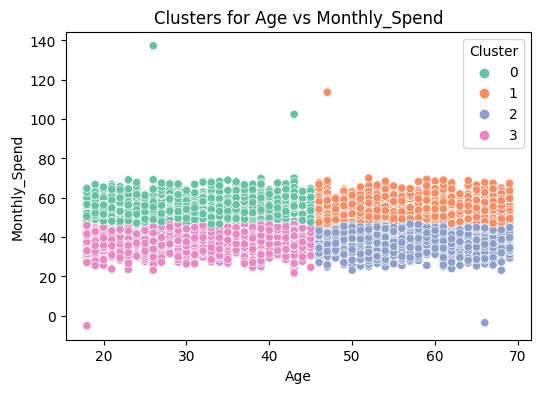


Analyzing Subscription_Length against Monthly_Spend...


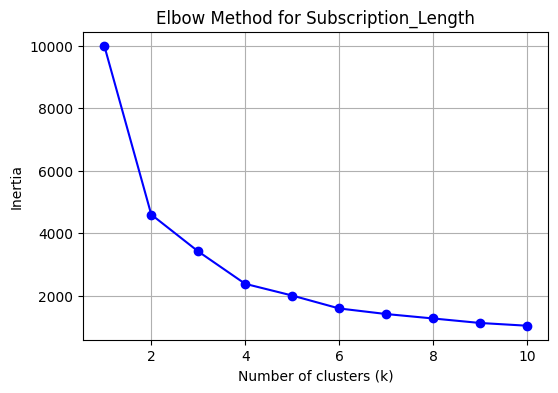

Enter the optimal number of clusters (k) for Subscription_Length:  3


Davies-Bouldin Index for Subscription_Length: 1.0069
Silhouette Coefficient for Subscription_Length: 0.3557


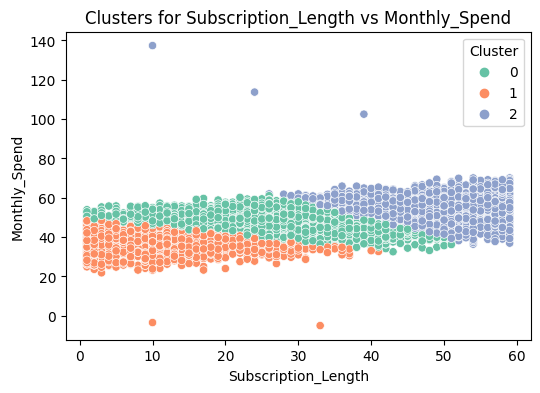


Analyzing Support_Tickets_Raised against Monthly_Spend...


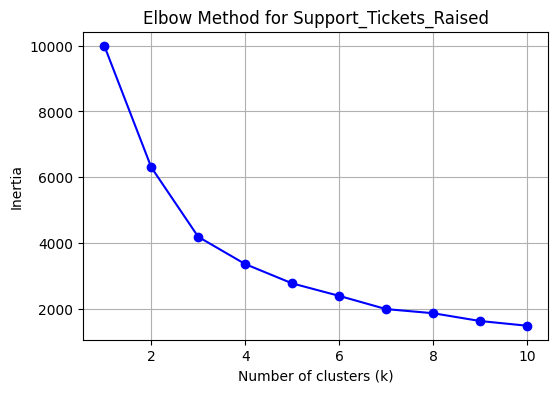

Enter the optimal number of clusters (k) for Support_Tickets_Raised:  3


Davies-Bouldin Index for Support_Tickets_Raised: 0.9167
Silhouette Coefficient for Support_Tickets_Raised: 0.3651


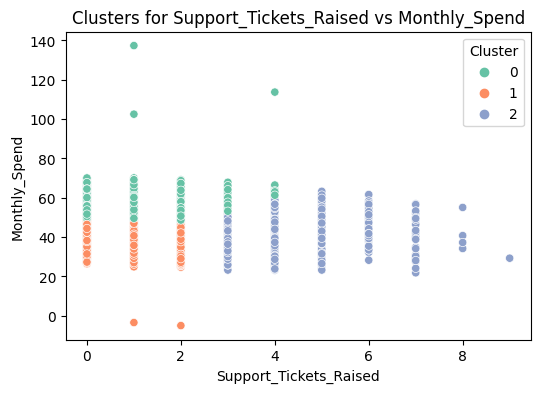


Analyzing Satisfaction_Score against Monthly_Spend...


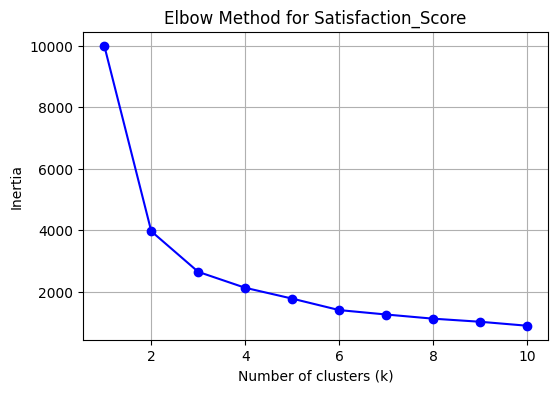

Enter the optimal number of clusters (k) for Satisfaction_Score:  2


Davies-Bouldin Index for Satisfaction_Score: 0.7363
Silhouette Coefficient for Satisfaction_Score: 0.4915


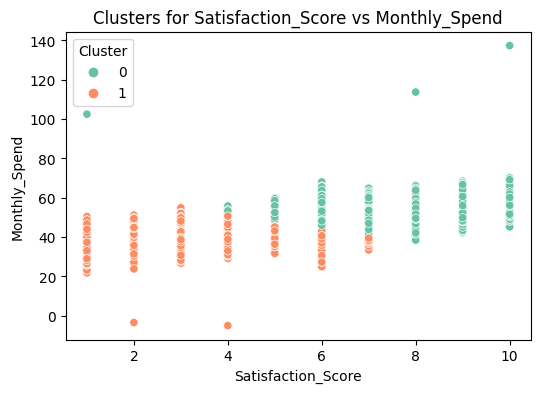


Analyzing Discount_Offered against Monthly_Spend...


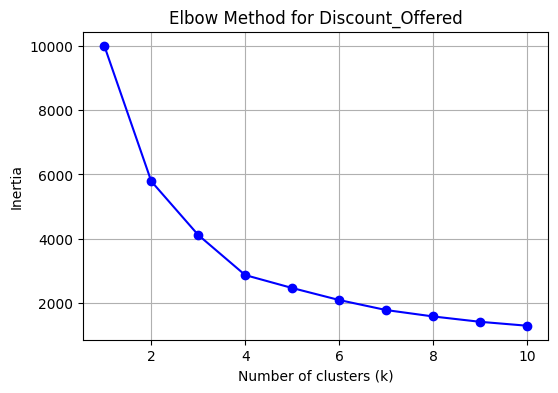

Enter the optimal number of clusters (k) for Discount_Offered:  4


Davies-Bouldin Index for Discount_Offered: 0.8603
Silhouette Coefficient for Discount_Offered: 0.3731


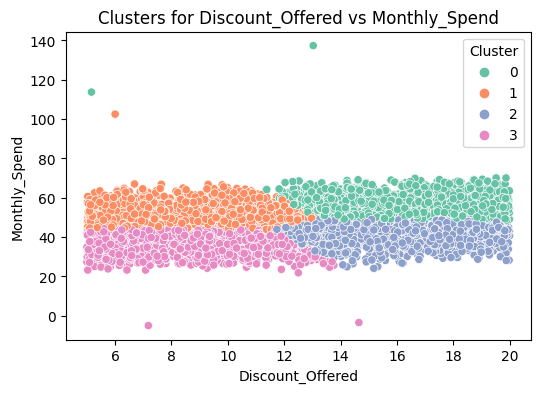


Analyzing Last_Activity against Monthly_Spend...


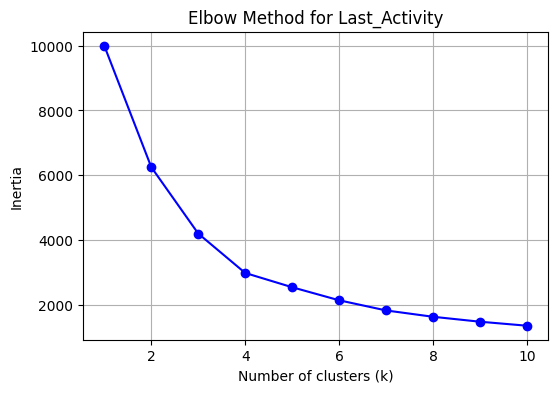

Enter the optimal number of clusters (k) for Last_Activity:  4


Davies-Bouldin Index for Last_Activity: 0.8579
Silhouette Coefficient for Last_Activity: 0.3660


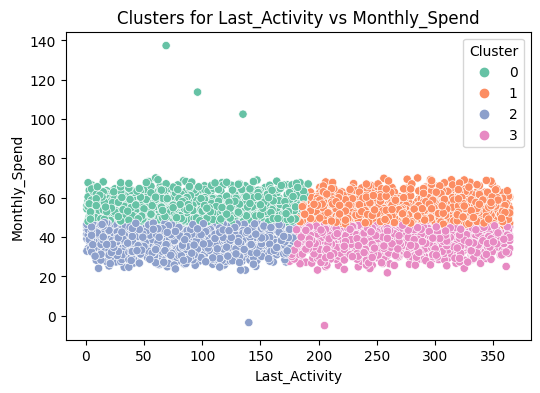

In [126]:
# Example usage:
target_col = "Monthly_Spend"
numerical_features = [
    "Age", "Subscription_Length", "Support_Tickets_Raised",
    "Satisfaction_Score", "Discount_Offered", "Last_Activity"
]

# Call the function
clustering_results = kmeans_clustering_loop(streaming_data_copy, target_col, numerical_features)


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

def analyze_clustering_with_monthly_spend(df, spend_col, features_to_test, k_min=2, k_max=10, random_state=42):
    """
    Performs K-Means clustering between Monthly Spend and other numerical features.
    Evaluates clustering quality using Davies-Bouldin Index and Silhouette Score.
    
    Parameters:
        df (pd.DataFrame): Your input dataset
        spend_col (str): The name of the column for Monthly Spend
        features_to_test (list): List of numerical columns to pair with Monthly Spend
        k_min (int): Minimum number of clusters to test
        k_max (int): Maximum number of clusters to test
        random_state (int): Seed for reproducibility

    Returns:
        dict: Evaluation scores and best k-values per feature
    """
    
    results = {}

    for feature in features_to_test:
        print(f"\n📊 Testing clusters for: {spend_col} vs {feature}")

        # Prepare the data
        pair_df = df[[spend_col, feature]].dropna()
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(pair_df)

        db_scores = []
        silhouette_scores = []
        cluster_range = range(k_min, k_max + 1)

        # Test multiple k values
        for k in cluster_range:
            kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
            labels = kmeans.fit_predict(scaled_data)

            db_scores.append(davies_bouldin_score(scaled_data, labels))
            silhouette_scores.append(silhouette_score(scaled_data, labels))

        # Determine the best k for each metric
        best_k_db = cluster_range[np.argmin(db_scores)]
        best_k_sil = cluster_range[np.argmax(silhouette_scores)]

        print(f"Davies-Bouldin Index scores: {db_scores}")
        print(f"Silhouette scores: {silhouette_scores}")
        print(f"→ Best k (DB Index): {best_k_db}")
        print(f"→ Best k (Silhouette): {best_k_sil}")

        # Plot results
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(cluster_range, db_scores, marker='o')
        plt.title(f"Davies-Bouldin Index ({feature})")
        plt.xlabel("Number of Clusters")
        plt.ylabel("DB Index")
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
        plt.title(f"Silhouette Score ({feature})")
        plt.xlabel("Number of Clusters")
        plt.ylabel("Silhouette Coefficient")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Save results
        results[feature] = {
            "Best_k_DB_Index": best_k_db,
            "Best_k_Silhouette": best_k_sil,
            "DB_Scores": db_scores,
            "Silhouette_Scores": silhouette_scores
        }

    return results



📊 Testing clusters for: Monthly_Spend vs Age
Davies-Bouldin Index scores: [1.2266389945361003, 0.9227027462947928, 0.8796038348991982, 0.8837719673367486, 0.8112150625252771, 0.7946251392324237, 0.8223295586438799, 0.8108709746353575, 0.8174361902938123]
Silhouette scores: [0.3258997192604971, 0.35685742506322365, 0.34236008612826324, 0.3415304807133683, 0.35918903376615197, 0.36224914020940757, 0.3531359797811442, 0.3549805187324894, 0.3514093368106573]
→ Best k (DB Index): 7
→ Best k (Silhouette): 7


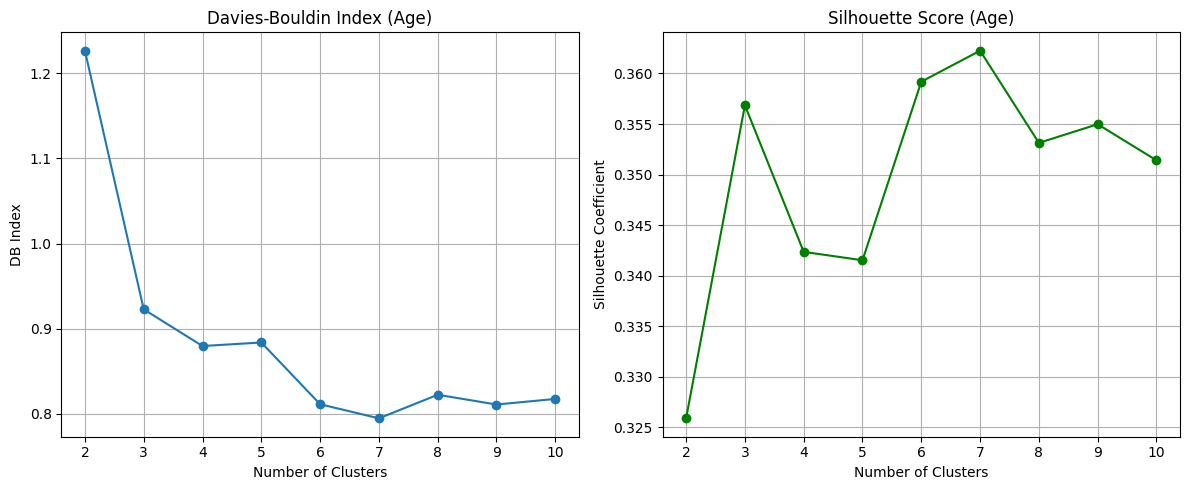


📊 Testing clusters for: Monthly_Spend vs Subscription_Length
Davies-Bouldin Index scores: [0.8367351406156588, 0.9954336065586263, 0.8352109617464836, 0.8641881578565556, 0.7626902170525263, 0.8213385821961052, 0.8360650007426695, 0.7993266196076515, 0.7502482850600662]
Silhouette scores: [0.4511810294081145, 0.3581888622218881, 0.3960450962689366, 0.37422409183312894, 0.3877759064105511, 0.36704960743571263, 0.35152327542063905, 0.3599169330459505, 0.3609752542556671]
→ Best k (DB Index): 10
→ Best k (Silhouette): 2


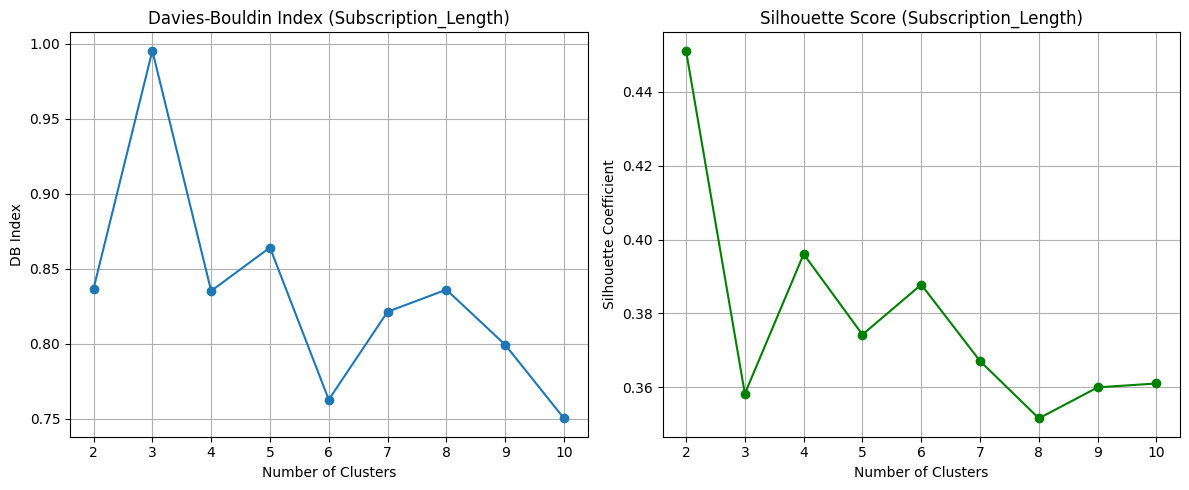


📊 Testing clusters for: Monthly_Spend vs Support_Tickets_Raised
Davies-Bouldin Index scores: [1.1417605930964096, 0.917146518864199, 0.9136012317186601, 0.9489014414378845, 0.8550097469564145, 0.8522283389005917, 0.8688309857092525, 0.8611619664080895, 0.8811584228086511]
Silhouette scores: [0.3469591263944368, 0.36510530230661853, 0.36119630672051, 0.3596169990602951, 0.3675478180159675, 0.36560488503075067, 0.3695891685801126, 0.37646926445347245, 0.37209978229423907]
→ Best k (DB Index): 7
→ Best k (Silhouette): 9


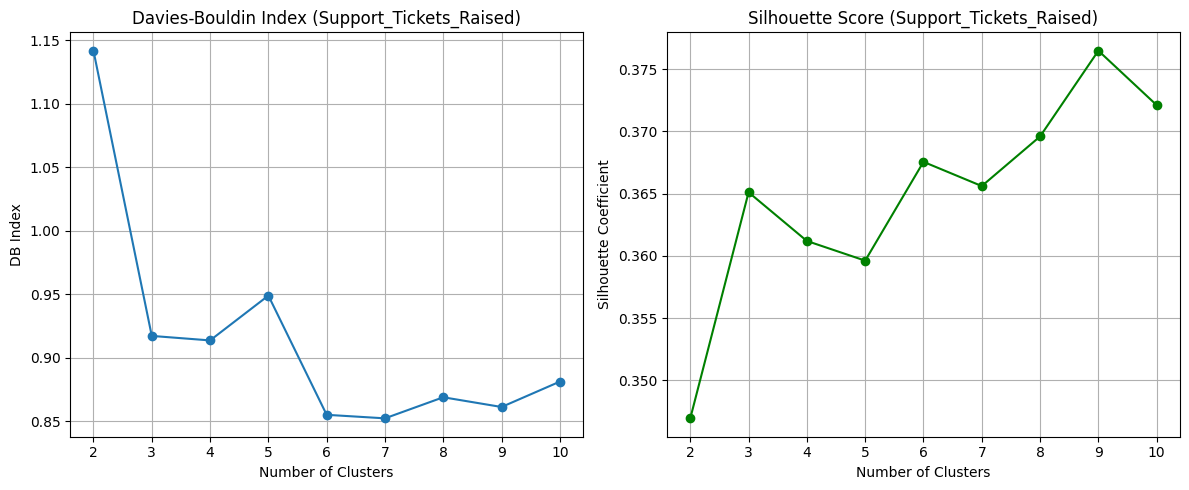


📊 Testing clusters for: Monthly_Spend vs Satisfaction_Score
Davies-Bouldin Index scores: [0.7365041106467367, 0.8374154931242693, 0.9623666562778627, 0.8944351507595402, 0.8348906581066706, 0.8158404716936262, 0.8016782172573997, 0.7540206828572473, 0.7731721100622962]
Silhouette scores: [0.49141038857511976, 0.4077757396652751, 0.3579819568375544, 0.37038032031268664, 0.3904740888691482, 0.3841278057963981, 0.37939306853207955, 0.3807255621122007, 0.37330969761694005]
→ Best k (DB Index): 2
→ Best k (Silhouette): 2


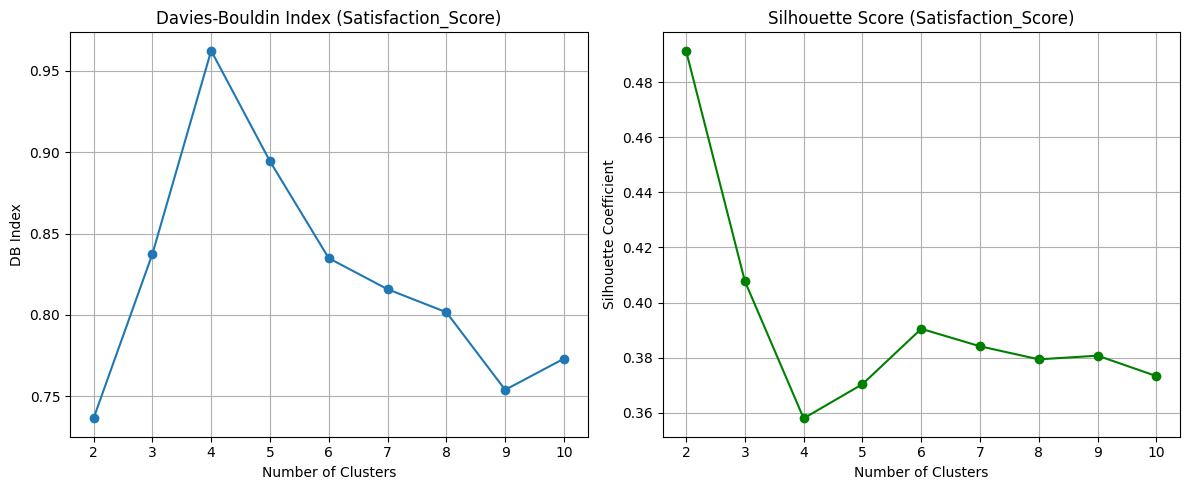


📊 Testing clusters for: Monthly_Spend vs Discount_Offered
Davies-Bouldin Index scores: [1.0396648697085817, 0.9214289405914339, 0.8632290245144053, 0.9164140624912157, 0.8836951915797435, 0.8344115625014809, 0.8470039002097804, 0.8249663547035317, 0.8594805643724011]
Silhouette scores: [0.38550813830341474, 0.3641410029501738, 0.37279742843328917, 0.3440399909627248, 0.3488134699192749, 0.3432464752875826, 0.34616812229312816, 0.34099863300782773, 0.3388268620290303]
→ Best k (DB Index): 9
→ Best k (Silhouette): 2


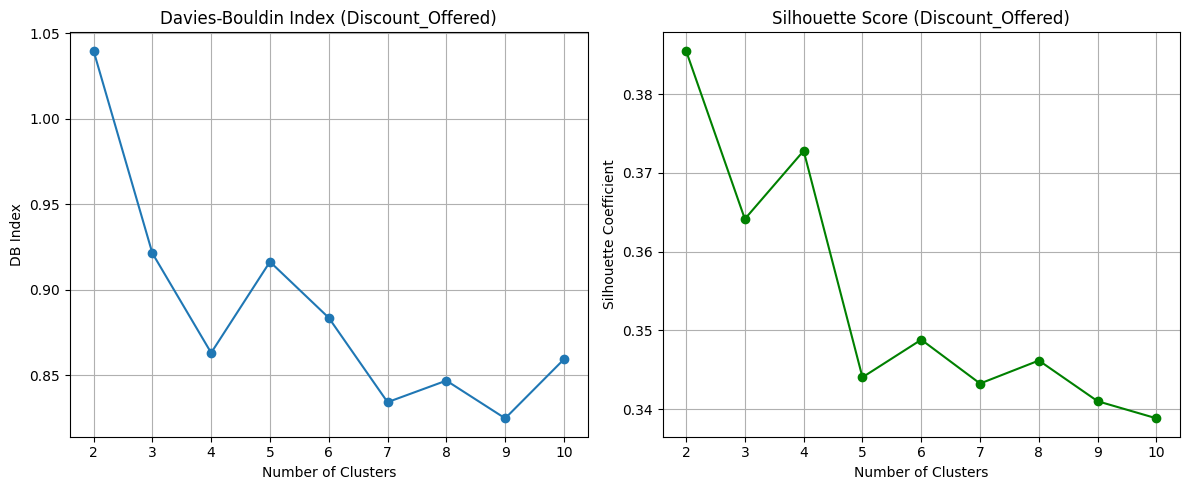


📊 Testing clusters for: Monthly_Spend vs Last_Activity
Davies-Bouldin Index scores: [1.1373805408482718, 0.8878405732498559, 0.8577370373474258, 0.8713722171302614, 0.8600050262028934, 0.8234742063720174, 0.818150021491266, 0.8470926021002134, 0.8706919510296143]
Silhouette scores: [0.36254870976785225, 0.36468167057735434, 0.3661104094932893, 0.35417227213939606, 0.34981087095075825, 0.3470294133662861, 0.34755677626456083, 0.3426642721403399, 0.33033321049680014]
→ Best k (DB Index): 8
→ Best k (Silhouette): 4


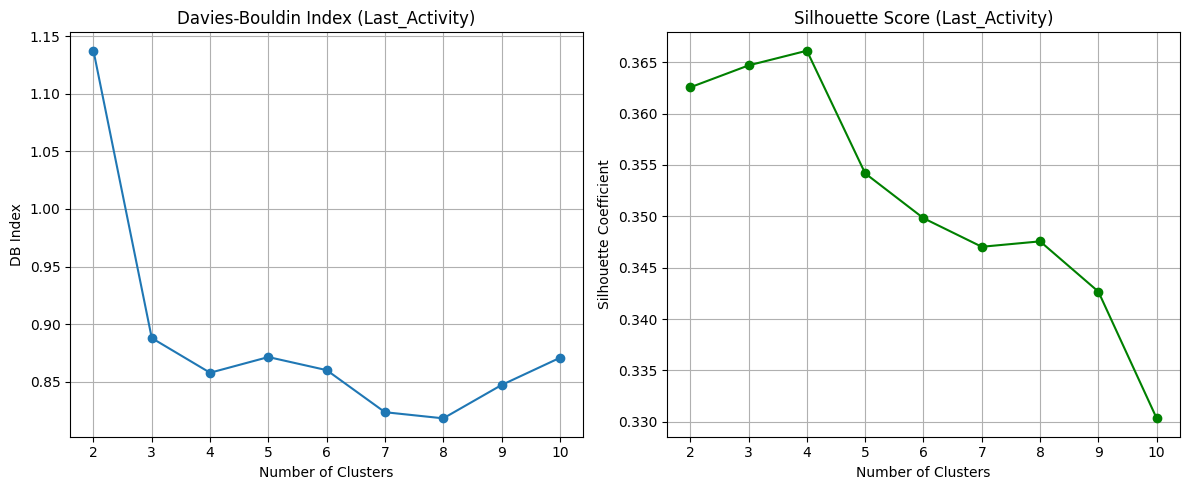


Feature: Age
  Optimal k (DB Index): 7
  Optimal k (Silhouette): 7

Feature: Subscription_Length
  Optimal k (DB Index): 10
  Optimal k (Silhouette): 2

Feature: Support_Tickets_Raised
  Optimal k (DB Index): 7
  Optimal k (Silhouette): 9

Feature: Satisfaction_Score
  Optimal k (DB Index): 2
  Optimal k (Silhouette): 2

Feature: Discount_Offered
  Optimal k (DB Index): 9
  Optimal k (Silhouette): 2

Feature: Last_Activity
  Optimal k (DB Index): 8
  Optimal k (Silhouette): 4


In [128]:
numerical_features = [
    "Age", "Subscription_Length", "Support_Tickets_Raised",
    "Satisfaction_Score", "Discount_Offered", "Last_Activity"
]

clustering_evals = analyze_clustering_with_monthly_spend(
    streaming_data_copy, "Monthly_Spend", numerical_features
)

# Optional: print a summary
for feat, vals in clustering_evals.items():
    print(f"\nFeature: {feat}")
    print(f"  Optimal k (DB Index): {vals['Best_k_DB_Index']}")
    print(f"  Optimal k (Silhouette): {vals['Best_k_Silhouette']}")
